# What sells a car?

This report aims to study data collected over the last few years from Crankshaft List. This website hosts hundreds of free advertisements for vehicles which are published on a daily basis. 

The dataset this analysis will be based on contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


After ensuring the consistency and completeness of data, as well as adding other relevant calculations, we'll move into determining which factors influence the price of a vehicle.


## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    vehicles_df=pd.read_csv('C:\\Users\\josef\\PRACTICUM\\Project 2-Vehicles pricing/vehicles_us.csv')
except:
    vehicles_df=pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

In [3]:
# print the general/summary information about the DataFrame
vehicles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print the first five rows of the dataset
vehicles_df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
#Print the last five rows
vehicles_df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [6]:
#Print a random sample
vehicles_df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
25785,7995,NaN,gmc acadia,good,6.0,gas,NaN,automatic,SUV,grey,NaN,2019-03-09,31
760,36995,2016.0,chevrolet silverado,like new,8.0,gas,20567.0,automatic,pickup,brown,1.0,2018-09-29,73
46873,4980,2010.0,nissan sentra,good,4.0,gas,99798.0,automatic,sedan,NaN,NaN,2018-11-22,36
27674,2800,2010.0,ford fusion se,good,4.0,gas,213000.0,automatic,sedan,silver,NaN,2018-12-05,13
20253,13900,2006.0,chevrolet silverado 1500,excellent,8.0,gas,NaN,automatic,truck,white,1.0,2018-05-10,72


In [7]:
#count of unique values by column
vehicles_df.nunique()

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

In [8]:
#Calculating percentage of missing values by column
(vehicles_df.isna().sum()/vehicles_df.shape[0]).sort_values(ascending=False)

is_4wd          0.503697
paint_color     0.179854
odometer        0.153168
cylinders       0.102086
model_year      0.070238
price           0.000000
model           0.000000
condition       0.000000
fuel            0.000000
transmission    0.000000
type            0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [9]:
#Describing columns with multiple unique values.

vehicles_df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [10]:
#print values of 'model-year' that seem weirdly old
vehicles_df.query('model_year < 1970')['model_year'].unique()

array([1966., 1967., 1969., 1965., 1968., 1964., 1963., 1955., 1954.,
       1962., 1948., 1960., 1908., 1961., 1936., 1949., 1958., 1929.])

In [11]:
#Describing columns with multiple unique values.
vehicles_df['odometer'].describe()


count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [12]:
#counting unique values in "is_4wd" to double-check

vehicles_df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

The dataset has 13 columns and 51525 rows. All the columns are properly named.
All the cars sold have apparently been posted between 2018 and 2019, and no odd prices have been noticed in the samples printed.

At first glance, the issues that will require fix are:

1) There are some columns which data types are to be changed based on their content:

- ``date_posted``:from string to datetime.
-  ``model_year``: to datetimeindex.year.
- ``cylinders``, ``odometer``, ``is_4wd`` : from float to integer.

2) ``is_4wd`` has only one unique value (1=True). Assuming that blanks coreespond to all the ones that do not have 4 wheels-driving, missing values will be replaced by 0 (False).

3) There are five columns with missing values, in on of them adding up to roughly the 50% of the total:

``is_4wd``          50%

``paint_color``     17%

``odometer``        15%

``cylinders``       10%

``model_year``      7%




4) ``model_year``and ``price``  have too small values in some rows: 1908 and $1 are the min, respectively.

5) ``odometer`` max value is excesively high, so outliers are to be analized.


5) There are categorical columns that will need to be replaced by ordinal numbers.



## Handling missing values

``is_4wd`` has only one unique value (1=True). Assuming that blanks coreespond to all the ones that do not have 4 wheels-driving, missing values will be replaced by 0 (False)

In [13]:
#Filling missing values in "is_4wd" with 0 
vehicles_df['is_4wd']=vehicles_df['is_4wd'].fillna(0)
vehicles_df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [14]:
#changing dtype to boolean
vehicles_df['is_4wd']=vehicles_df['is_4wd'].astype(bool)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


**``paint_color`` : As missing values represent a high proportion of data (17%), dropping those rows would reduce the sample significantly and may lead to a biased conclusion. Hence, we'll start by assessing the correlation between paint color and price in those sales for which neither price nor paint_color are missing. In order to be able to do so, we'll sort colors based on the median price at which cars were sold, and assign a correlative number starting by 1, in ascending order.**

In [15]:
#Assess the percentage of each color sold over the total of sales comprised in the dataset
color_proportion= vehicles_df['paint_color'].value_counts()/vehicles_df['paint_color'].count()
color_proportion

white     0.237328
black     0.182025
silver    0.147759
grey      0.119196
blue      0.105897
red       0.104619
green     0.033035
brown     0.028941
custom    0.027285
yellow    0.006034
orange    0.005466
purple    0.002414
Name: paint_color, dtype: float64

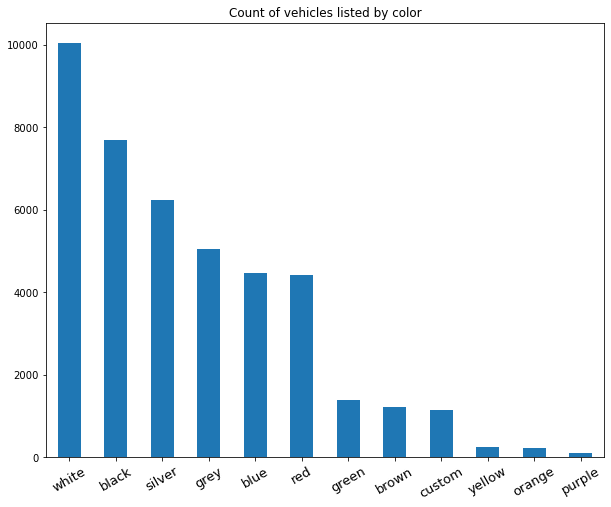

In [16]:
# Create barchart to visualize the reps of each color
vehicles_df['paint_color'].value_counts().plot(kind='bar', figsize=(10,8), title="Count of vehicles listed by color").tick_params(axis='x', labelsize=13, rotation=30)

In [17]:
#we'll group all the ones representing any proportion lower than 10% in the overall dataset in "others"

#select the colors below 10%
group_colors =[color for color in color_proportion.index if color_proportion[color]<0.10]
group_colors

#change in the dataset
vehicles_df.loc[vehicles_df['paint_color'].isin(group_colors),'paint_color'] = 'other'

In [18]:
#re-check
color_proportion= vehicles_df['paint_color'].value_counts()/vehicles_df['paint_color'].count()
color_proportion

white     0.237328
black     0.182025
silver    0.147759
grey      0.119196
blue      0.105897
red       0.104619
other     0.103176
Name: paint_color, dtype: float64

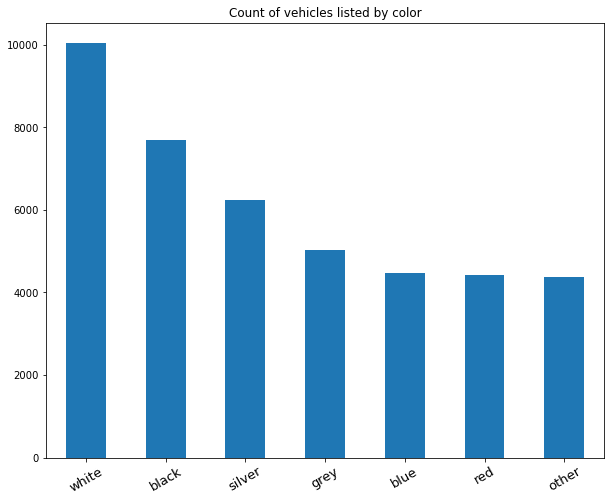

In [19]:
# Create barchart to visualize the reps of each color after grouping
vehicles_df['paint_color'].value_counts().plot(kind='bar', figsize=(10,8), title= "Count of vehicles listed by color").tick_params(axis='x', labelsize=13, rotation=30)

In [20]:
#create pivot table and sort by median price
color_counts=vehicles_df.pivot_table(index='paint_color', values='price', aggfunc=['median','mean'])
color_counts.sort_values(by=('median','price'), inplace=True)
color_counts

,median,mean
,price,price
paint_color,,
other,7325,10055.919725
blue,7500,10269.714860
silver,7999,10667.568546
grey,8500,11459.564622
red,8701,11450.044786
black,10995,13741.893786
white,11500,14147.443913


**We can notice that if we sorted by mean the results would not change that much. We'll use the median as we've noticed a considerable dispersion when applying describe() to price:**

In [21]:
colors_to_number ={}
for i,color in enumerate(color_counts.index):
    colors_to_number[color]= i+1
colors_to_number    

{'other': 1,
 'blue': 2,
 'silver': 3,
 'grey': 4,
 'red': 5,
 'black': 6,
 'white': 7}

In [22]:
#create dataframe with rows where paint_color is not null

color_price_df=vehicles_df[(vehicles_df['paint_color'].isna()==False)][['paint_color', 'price']]

In [23]:
#Create new column assigning the corresponding ID to each color

color_price_df['paint_color_id'] = color_price_df['paint_color'].apply(lambda color: colors_to_number[color])


In [24]:
#Evaluate numeric correlation
color_price_df.corr()

,price,paint_color_id
price,1.000000,0.154284
paint_color_id,0.154284,1.000000


(0.0, 375000.0)

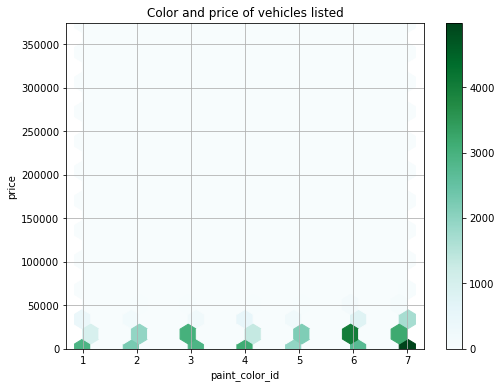

In [25]:
color_price_df.plot(title='Color and price of vehicles listed',x='paint_color_id', y='price',  kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.ylim(0, 375000)


**Lack of linear correlation between color and price is even more plausible in the chart above.**

In [26]:
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna('unknown')

**The correlation is rather low meaning that paint_color does not have a significant impact on price. Thus, replacing missing values with 'unknown' is considered the most efficient way to resolve this issue.**

In [27]:
vehicles_df['paint_color'].value_counts()/vehicles_df['paint_color'].count()

white      0.194643
unknown    0.179854
black      0.149287
silver     0.121184
grey       0.097758
blue       0.086851
red        0.085803
other      0.084619
Name: paint_color, dtype: float64

In [28]:
#check the correct replacement of missing values
vehicles_df['paint_color'].isna().sum()

0

**After replacing the values, we see that it became the second largest category on the dataset. This confirms that replacing those values based on the mode, or assigning real colors on whatever basis could have skewed the results of this analysis.**

**``odometer``: with 15% of values missing, this observation is commonly a huge conditioning of the price at which a car is sold, as it is an indicator of its depreciation over time. For the sake of handleability, we'll expose the values in thousands.**

**We'll start by assesing values dispersion, and treating odd values, if any. Then we'll assess if the mileage of a car is more highly correlated to its condition or its model year, and fill out the missing values based on the most impactfull of both (after fixing any inconsistencies that may be detected along the way), combined to the vehicle model .**

In [29]:
#Change odometers to thousands
vehicles_df['odometer'] =vehicles_df['odometer']/1000

In [30]:
#print a description of the column's general statistics
vehicles_df['odometer'].describe()

count    43633.000000
mean       115.553462
std         65.094611
min          0.000000
25%         70.000000
50%        113.000000
75%        155.000000
max        990.000000
Name: odometer, dtype: float64

Text(0, 0.5, 'cars sold')

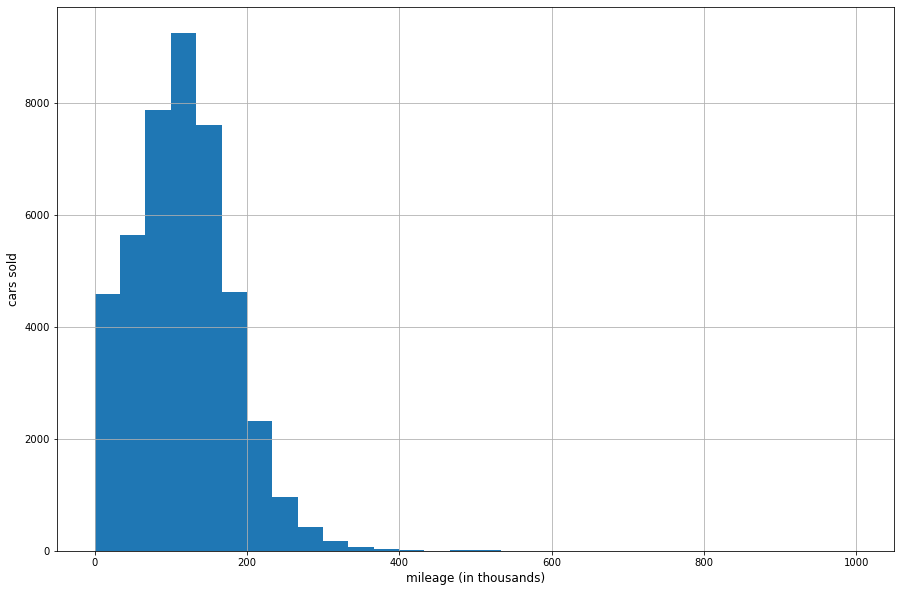

In [31]:
#Plot odometer distribution

vehicles_df['odometer'].hist(figsize=(15,10), bins=30, range=(0,999) )
plt.xlabel('mileage (in thousands)', size=12)
plt.ylabel('cars sold', size=12)





In [32]:
#Calculate the theoretical Q3 for determining outliers :
Q1_odometer = vehicles_df['odometer'].quantile(0.25)
Q3_odometer = vehicles_df['odometer'].quantile(0.75)
IQR_odometer= Q3_odometer - Q1_odometer
th_Q3_odometer = Q3_odometer + IQR_odometer*1.5
th_Q3_odometer

282.5

Text(0, 0.5, 'Mileage (in thousands)')

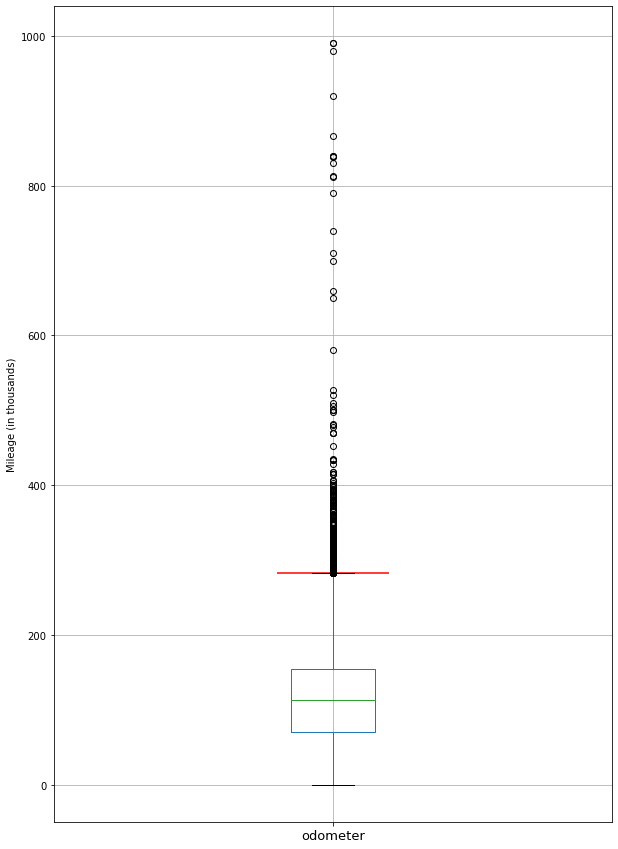

In [33]:
#Plot dispersion
vehicles_df.boxplot('odometer',figsize=(10,15)).tick_params(axis='x', labelsize=13)
plt.hlines(y=th_Q3_odometer, xmin=0.9, xmax=1.1, color='red')
plt.ylabel('Mileage (in thousands)')


In [34]:
#Slice the dataframe to asses the % of vehicles which odometer mileage is higher than the theoretical Q3 value (282.5 k)
too_high_odometer = vehicles_df.query('odometer > @th_Q3_odometer')
print(f'The total rows where the odometer counter has values over 283 k miles are {len(too_high_odometer)}, which represents a {len(too_high_odometer)/len(vehicles_df)*100:.2f}% of the total population ({len(vehicles_df)} rows)')


The total rows where the odometer counter has values over 283 k miles are 487, which represents a 0.95% of the total population (51525 rows)


Text(0, 0.5, 'mileage (in thousands)')

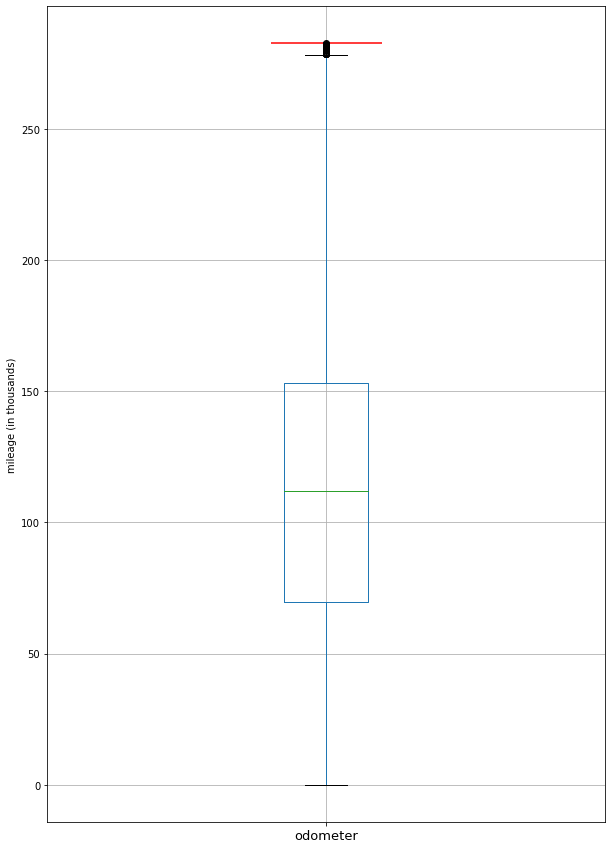

In [35]:
#As odometer is a key value when it comes to car pricing, for it being an indicator of their remaining life expectancy,
#replacing odd values based on, for example, model_year, can lead to a biased conclusion.
#Also, while older models should tend to have larger miles traveled, this will also depend in how intensive their usage was.
#The safest thing to do here is dropping the rows with outliers, as they account for less than the 1% of the total dataset.

vehicles_df= vehicles_df.query('~(odometer> @th_Q3_odometer) ')

#Re-Plot dispersion
vehicles_df.boxplot('odometer',figsize=(10,15)).tick_params(axis='x', labelsize=13)
plt.hlines(y=th_Q3_odometer, xmin=0.9, xmax=1.1, color='red')
plt.ylabel('mileage (in thousands)')


In [36]:
#print length after removing outliers
len(vehicles_df)

51038

In [37]:
#print column statistics after removing outliers
vehicles_df['odometer'].describe()

count    43146.000000
mean       113.005667
std         59.845355
min          0.000000
25%         69.597000
50%        112.100000
75%        153.108000
max        282.493000
Name: odometer, dtype: float64

**``model_year``: as we will assess the feasibility to fill out missing values in odometer confidently (the oldest the car, probably the largest the mileage count), first we need to ensure that there aren't odd figures within this column**

In [38]:
#Describe values in model_year:

vehicles_df['model_year'].describe()

count    47459.000000
mean      2009.814450
std          6.253289
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

**The min value for``model_year`` is impossibly low. Let's plot the dispersion and take a look at outliers**

In [39]:
#Calculate the theoretical Q1 for determining outliers :
Q1_modelyear = vehicles_df['model_year'].quantile(0.25)
Q3_modelyear = vehicles_df['model_year'].quantile(0.75)
IQR_modelyear= Q3_modelyear - Q1_modelyear
th_Q1_modelyear = Q1_modelyear - IQR_modelyear*1.5
th_Q1_modelyear

1994.0

Text(0, 0.5, 'year')

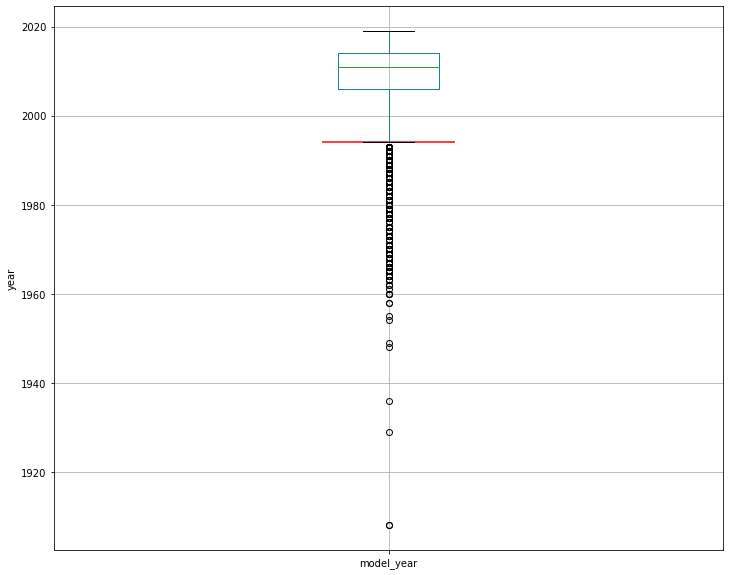

In [40]:
#Plotting dispersion:

vehicles_df.boxplot('model_year', figsize=(12,10))
plt.hlines(y= th_Q1_modelyear, xmin=0.9, xmax=1.1, color='red')
plt.ylabel('year')


In [41]:
#Slice the dataframe to asses the % of vehicles which model_year is less than the theoretical Q1 value (1994)
too_old_vehicles= vehicles_df.query('model_year < @th_Q1_modelyear')
print(f'The total rows where the model_year is less than 1994 are {len(too_old_vehicles)}, which represents a {len(too_old_vehicles)/len(vehicles_df)*100:.2f}% of the total population ({len(vehicles_df)} rows)')

The total rows where the model_year is less than 1994 are 694, which represents a 1.36% of the total population (51038 rows)


Text(0, 0.5, 'year')

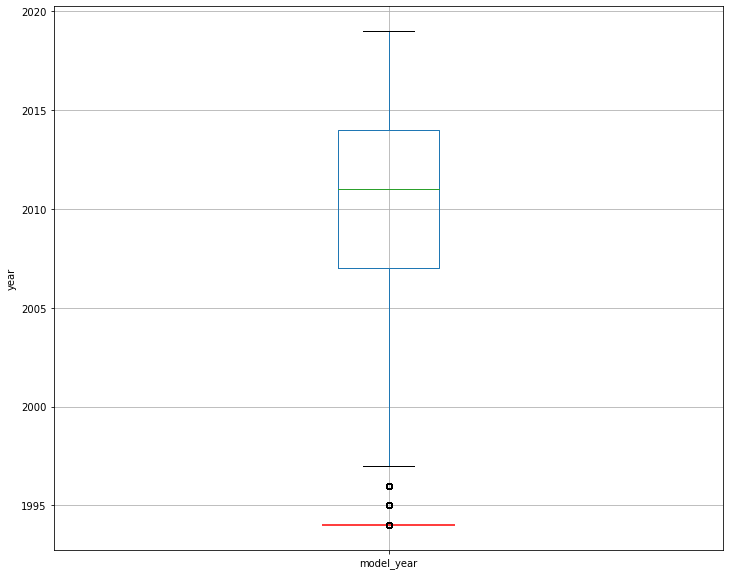

In [42]:
#As outliers represent less than the 2% of the total population, we can safely set them aside.

vehicles_df= vehicles_df.query('~(model_year < @th_Q1_modelyear)')

#Plotting dispersion to check the results:

vehicles_df.boxplot('model_year', figsize=(12,10))
plt.hlines(y= th_Q1_modelyear, xmin=0.9, xmax=1.1, color='red')

plt.ylabel("year")


In [43]:
#Print length after removal
len(vehicles_df)

50344

In [44]:
#print new percentages of missing values
vehicles_df.isna().sum()/len(vehicles_df)

price           0.000000
model_year      0.071091
model           0.000000
condition       0.000000
cylinders       0.101879
fuel            0.000000
odometer        0.154716
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

**Next, we'll evaluate if model_year missing values can be more reliably inferred from condition or odometer values (the older the model, the worse the condition vs. the older the model, the higher the mileage)**

In [45]:
#Print unique values for condition
vehicles_df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [46]:
#"New" and "like new" will be homogeneized 
vehicles_df['condition']=vehicles_df['condition'].replace('like new','new')

vehicles_df['condition'].unique()

array(['good', 'new', 'fair', 'excellent', 'salvage'], dtype=object)

In [47]:
#Assign an ID from worse to best condition

condition_dic=  {'new':1, 'excellent':2, 'good':3 , 'fair':4, 'salvage':5}


vehicles_df['condition_id']= vehicles_df['condition'].apply(lambda condition: condition_dic[condition] )
vehicles_df.groupby('condition_id')['condition'].unique()

condition_id
1          [new]
2    [excellent]
3         [good]
4         [fair]
5      [salvage]
Name: condition, dtype: object

In [48]:
vehicles_df[['condition_id','odometer','model_year']].corr()

,condition_id,odometer,model_year
condition_id,1.000000,0.293808,-0.302257
odometer,0.293808,1.000000,-0.601757
model_year,-0.302257,-0.601757,1.000000


**From the correlation rates, we conclude it's more reliable to fill missing values in model_year based on ``odometer`` than it is on ``condition``**

(0.0, 300.0)

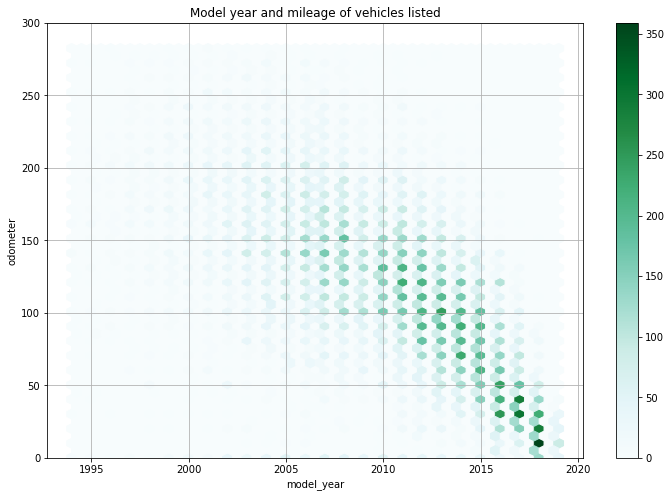

In [49]:
#Plotting correlation between odometer and model year

vehicles_df.plot(x='model_year', y='odometer',  kind='hexbin', gridsize=50, sharex=False, grid=True,figsize=(12,8), title='Model year and mileage of vehicles listed')
plt.ylim(0, 300)



**The negative correlation between both columns is easily distinguished in this chart. Still, odometer also depends on how intensive the usage of the vehicle was each year, so the line drawn is not a perfect 45º diagonal**

In [50]:
#Now, let's categorize data in odometer

In [51]:
#Print column's decription
vehicles_df['odometer'].describe()

count    42555.000000
mean       113.077751
std         59.691832
min          0.000000
25%         69.910000
50%        112.228000
75%        153.006000
max        282.493000
Name: odometer, dtype: float64

Text(0, 0.5, 'Frequency')

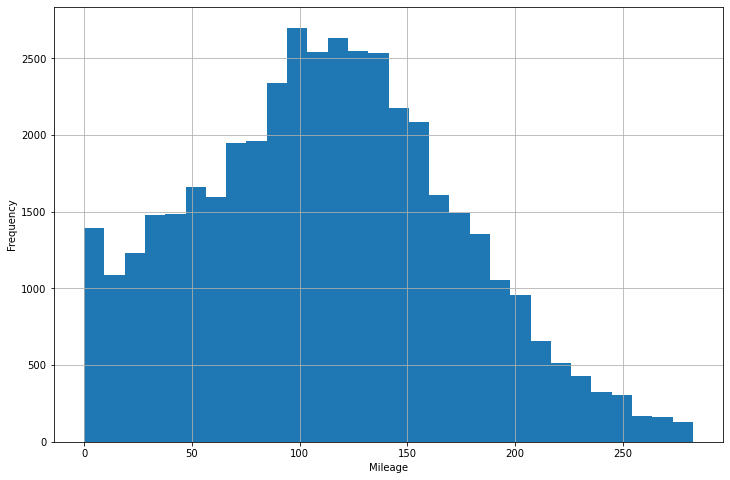

In [52]:
#Plot the distribution of 'odometer'
vehicles_df['odometer'].hist(bins=30, figsize=(12,8))

plt.xlabel("Mileage")
plt.ylabel("Frequency")

In [53]:
#grouping odometer 
def group_odometer(odometer):
    
    '''
    Assigns groups to each vehicle
    based on their mileage.
    < 70 k.
    70k <= odometer < 120 k
    120k <= odometer < 155 k
    155k <= odometer < 283 k
    
    '''
    if odometer <70:
        return 1, '< 70k'
    elif odometer< 120:
        return 2, '70k <= odometer < 120 k'
    elif odometer < 155:
        return 3, '120k <= odometer < 155 k'
    else:
        return 4, '155k <= odometer < 283 k'

In [54]:
#apply to df
vehicles_df['odometer_range'] = vehicles_df['odometer'].apply(group_odometer) 

In [55]:

#split ID and group into two columns  where odometer is not null and drop the original one
vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_group_id'] =  list(map(lambda x : x[0], vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_range']))
vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_group'] =  list(map(lambda x : x[1], vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_range']))
vehicles_df.drop('odometer_range',axis=1, inplace=True)

vehicles_df.reset_index(inplace=True, drop=True)
vehicles_df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group
0,9400,2011.0,bmw x5,good,6.0,gas,145.000,automatic,SUV,unknown,True,2018-06-23,19,3,3,120k <= odometer < 155 k
1,25500,NaN,ford f-150,good,6.0,gas,88.705,automatic,pickup,white,True,2018-10-19,50,3,2,70k <= odometer < 120 k
2,5500,2013.0,hyundai sonata,new,4.0,gas,110.000,automatic,sedan,red,False,2019-02-07,79,1,2,70k <= odometer < 120 k
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9,4,4,155k <= odometer < 283 k
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80.903,automatic,sedan,black,False,2019-04-02,28,2,2,70k <= odometer < 120 k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50339,9249,2013.0,nissan maxima,new,6.0,gas,88.136,automatic,sedan,black,False,2018-10-03,37,1,2,70k <= odometer < 120 k
50340,2700,2002.0,honda civic,salvage,4.0,gas,181.500,automatic,sedan,white,False,2018-11-14,22,5,4,155k <= odometer < 283 k
50341,3950,2009.0,hyundai sonata,excellent,4.0,gas,128.000,automatic,sedan,blue,False,2018-11-15,32,2,3,120k <= odometer < 155 k
50342,7455,2013.0,toyota corolla,good,4.0,gas,139.573,automatic,sedan,black,False,2018-07-02,71,3,3,120k <= odometer < 155 k


Text(0, 0.5, 'Frecuency')

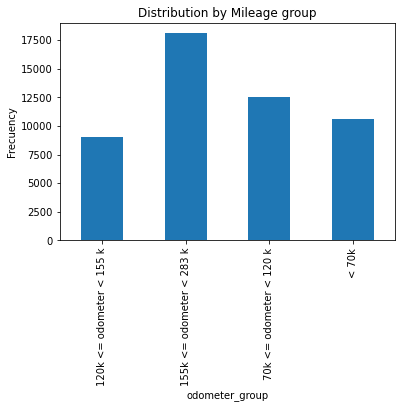

In [56]:
#Analyze distribution of odometer categories
vehicles_df.groupby('odometer_group')['odometer_group_id'].count().plot(kind='bar', title='Distribution by Mileage group')
plt.ylabel('Frecuency')


In [57]:
#First, for all we'll check the % of rows where both odometer and model_year are missing 
len_non_na= len(vehicles_df[(vehicles_df['model_year'].isna()) & (vehicles_df['odometer'].isna()) ])

print(f'The total rows where both odometer and model_year are missing add up to {len_non_na}, which represents a {len_non_na/len(vehicles_df)*100:.2f}% of the total population ({len(vehicles_df)} rows)')


The total rows where both odometer and model_year are missing add up to 549, which represents a 1.09% of the total population (50344 rows)


**The missing values will be replaced by the median of vehicle's same model and odometer group.
In case there's no value available, model_year will be filled out with the median of the odometer group**

**We'll drop the rows, where both odometer and model_year are missing, as they account for less than the 2% of the dataset, 
and the correlation both have to condition is too low so as to confidently replace values based on that column**

In [58]:
#Reassign the dataset with rows where not both values are missing
vehicles_df= vehicles_df.query('~(model_year.isnull() & odometer.isnull())', engine='python').copy()

In [59]:
#Reset index and drop the older one
vehicles_df.reset_index(inplace= True, drop = True)

In [60]:
#Check if there are no further rows where both values are missing

len_non_na= len(vehicles_df[(vehicles_df['model_year'].isna()) & (vehicles_df['odometer'].isna()) ])

print(f'The total rows where both odometer and model_year are missing add up to {len_non_na}, which represents a {len_non_na/len(vehicles_df)*100:.2f}% of the total population ({len(vehicles_df)} rows)')


The total rows where both odometer and model_year are missing add up to 0, which represents a 0.00% of the total population (49795 rows)


In [61]:
#We'll fill model_year based on model and odometer. Let's assess the % of empty values left
vehicles_df['model_year'].isna().sum()/len(vehicles_df)


0.06084948287980721

<AxesSubplot:>

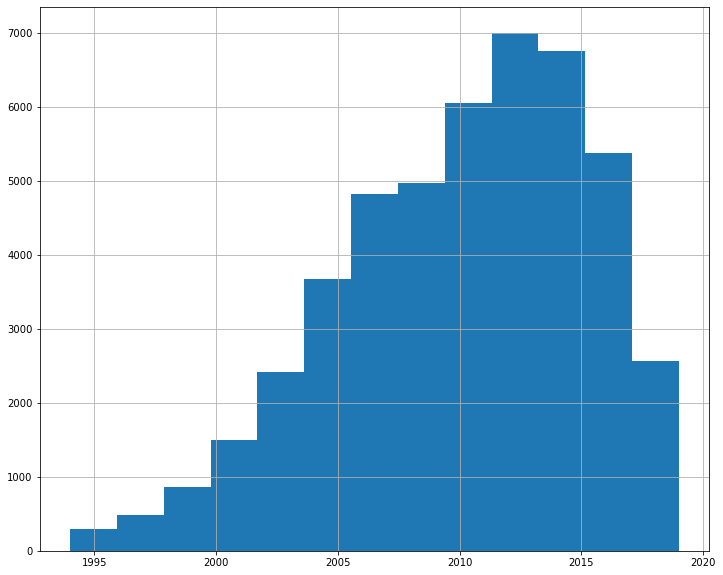

In [62]:
#Plot before replacing Nan
vehicles_df['model_year'].hist(bins=13, figsize=(12,10))

In [63]:
#store indexes to later check data fulfillment
model_year_missing_index= vehicles_df[vehicles_df['model_year'].isna()].index
model_year_missing_index

Int64Index([    1,    20,    63,    67,    70,    82,   100,   112,   114,
              141,
            ...
            49657, 49668, 49672, 49682, 49709, 49734, 49735, 49757, 49758,
            49778],
           dtype='int64', length=3030)

In [64]:
# Create pivot to get the median "model_year" for each model within each odometer group.
model_year_pivot= vehicles_df.pivot_table(index=['model','odometer_group'], values='model_year', aggfunc='median')
model_year_pivot.reset_index(inplace=True)
model_year_pivot

,model,odometer_group,model_year
0,acura tl,120k <= odometer < 155 k,2007.0
1,acura tl,155k <= odometer < 283 k,2006.0
2,acura tl,70k <= odometer < 120 k,2008.0
3,acura tl,< 70k,2012.0
4,bmw x5,120k <= odometer < 155 k,2008.0
...,...,...,...
389,volkswagen jetta,< 70k,2015.5
390,volkswagen passat,120k <= odometer < 155 k,2008.0
391,volkswagen passat,155k <= odometer < 283 k,2008.5
392,volkswagen passat,70k <= odometer < 120 k,2013.0


In [65]:
# Create pivot to get the median "model_year" for each each odometer group.
# In case any matches are found in the previous pivot table, odometer group for the missing value will be
#looked up here, and model_year will be filled out with its median.

model_year_pivot_iferror=vehicles_df.pivot_table(index='odometer_group', values='model_year', aggfunc='median')
model_year_pivot_iferror.reset_index(inplace=True)
model_year_pivot_iferror

,odometer_group,model_year
0,120k <= odometer < 155 k,2009.0
1,155k <= odometer < 283 k,2008.0
2,70k <= odometer < 120 k,2012.0
3,< 70k,2016.0


In [66]:
#Fill missing values in model_year.

for i in range(len(vehicles_df)):
    if pd.isnull(vehicles_df.loc[i, 'model_year']):
        model = vehicles_df.loc[i,'model']
        odometer= vehicles_df.loc[i,'odometer_group']
        
        
        
        
        if len(model_year_pivot.query('model ==@model & odometer_group==@odometer '))>0 :
            model_year= model_year_pivot.loc[(model_year_pivot['odometer_group']==odometer) & (model_year_pivot['model']==model),'model_year'].item()
            vehicles_df.loc[i, 'model_year'] = model_year
        else:
            model_year_error=  model_year_pivot_iferror.loc[(model_year_pivot_iferror['odometer_group']==odometer) ,'model_year'].item()
            vehicles_df.loc[i, 'model_year'] = model_year_error
                
    else:
        continue
        
    

In [67]:
#print an overview of the replaced values:
vehicles_df[vehicles_df.index.isin(model_year_missing_index)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group
1,25500,2013.0,ford f-150,good,6.0,gas,88.705,automatic,pickup,white,True,2018-10-19,50,3,2,70k <= odometer < 120 k
20,6990,2009.0,chevrolet tahoe,excellent,8.0,gas,147.485,automatic,SUV,silver,True,2018-08-05,28,2,3,120k <= odometer < 155 k
63,12800,2013.0,ford f-150,excellent,6.0,gas,108.500,automatic,pickup,white,False,2018-09-23,15,2,2,70k <= odometer < 120 k
67,7800,2013.0,ford f-150,new,8.0,gas,97.510,automatic,truck,white,True,2019-02-20,39,1,2,70k <= odometer < 120 k
70,3650,2011.0,subaru impreza,excellent,NaN,gas,74.000,automatic,sedan,blue,True,2018-08-07,60,2,2,70k <= odometer < 120 k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,8890,2007.0,ford f250 super duty,good,8.0,gas,135.778,automatic,truck,red,True,2018-11-28,24,3,3,120k <= odometer < 155 k
49735,34595,2013.5,gmc yukon,excellent,8.0,gas,86.456,automatic,SUV,silver,True,2019-04-18,13,2,2,70k <= odometer < 120 k
49757,1495,2016.0,ford f-150,fair,6.0,gas,15.804,manual,truck,white,True,2018-09-18,56,4,1,< 70k
49758,21900,2013.0,chevrolet silverado 3500hd,excellent,8.0,diesel,203.000,automatic,truck,white,True,2018-12-27,37,2,4,155k <= odometer < 283 k


In [68]:
#check the column as no NaN values
vehicles_df['model_year'].isna().sum()

0

**Now all the values are filled, model_year will be categorized as well**

In [69]:

#Categorizing model year
vehicles_df['model_year'].describe()

count    49795.000000
mean      2010.246270
std          5.185836
min       1994.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [70]:
#we'll group model year into 4 ranges:

def group_model_year(year):
    '''
    Assigns groups to each vehicle
    based on their mileage.
    1994-2005
    2005-2009
    2010-2014
    2015-2019
    
    '''
    if year <2005:
        return 1, '1994-2005'
    elif year< 2010:
        return 2, '2005-2009'
    elif year < 2015:
        return 3, '2010-2014'
    elif year <2020:
        return 4, '2015-2019'


In [71]:
#Create new column with the group model_year
vehicles_df['model_year_range'] = vehicles_df['model_year'].apply(group_model_year) 

In [72]:
#check new column was added
vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_range
0,9400,2011.0,bmw x5,good,6.0,gas,145.000,automatic,SUV,unknown,True,2018-06-23,19,3,3,120k <= odometer < 155 k,"(3, 2010-2014)"
1,25500,2013.0,ford f-150,good,6.0,gas,88.705,automatic,pickup,white,True,2018-10-19,50,3,2,70k <= odometer < 120 k,"(3, 2010-2014)"
2,5500,2013.0,hyundai sonata,new,4.0,gas,110.000,automatic,sedan,red,False,2019-02-07,79,1,2,70k <= odometer < 120 k,"(3, 2010-2014)"
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9,4,4,155k <= odometer < 283 k,"(1, 1994-2005)"
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80.903,automatic,sedan,black,False,2019-04-02,28,2,2,70k <= odometer < 120 k,"(4, 2015-2019)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49790,9249,2013.0,nissan maxima,new,6.0,gas,88.136,automatic,sedan,black,False,2018-10-03,37,1,2,70k <= odometer < 120 k,"(3, 2010-2014)"
49791,2700,2002.0,honda civic,salvage,4.0,gas,181.500,automatic,sedan,white,False,2018-11-14,22,5,4,155k <= odometer < 283 k,"(1, 1994-2005)"
49792,3950,2009.0,hyundai sonata,excellent,4.0,gas,128.000,automatic,sedan,blue,False,2018-11-15,32,2,3,120k <= odometer < 155 k,"(2, 2005-2009)"
49793,7455,2013.0,toyota corolla,good,4.0,gas,139.573,automatic,sedan,black,False,2018-07-02,71,3,3,120k <= odometer < 155 k,"(3, 2010-2014)"


In [73]:
#split into two columns and drop the original one
vehicles_df.loc[pd.notnull(vehicles_df['model_year_range']),'model_year_group_id'] =  list(map(lambda x : x[0], vehicles_df.loc[pd.notnull(vehicles_df['model_year_range']),'model_year_range']))
vehicles_df.loc[pd.notnull(vehicles_df['model_year_range']),'model_year_group'] =  list(map(lambda x : x[1], vehicles_df.loc[pd.notnull(vehicles_df['model_year_range']),'model_year_range']))
vehicles_df.drop('model_year_range',axis=1, inplace=True)


In [74]:
#CHECKING GROUPS WERE CORRECTLY ASSIGNED
vehicles_df.groupby(['model_year_group','model_year']).size()

model_year_group  model_year
1994-2005         1994.0         112
                  1995.0         178
                  1996.0         170
                  1997.0         312
                  1998.0         364
                  1999.0         501
                  2000.0         686
                  2001.0         809
                  2002.0        1024
                  2003.0        1418
                  2004.0        1703
2005-2009         2005.0        2109
                  2005.5           9
                  2006.0        2329
                  2007.0        2913
                  2007.5           3
                  2008.0        3268
                  2008.5          26
                  2009.0        2200
                  2009.5           3
2010-2014         2010.0        2976
                  2011.0        3572
                  2011.5          12
                  2012.0        3731
                  2012.5          19
                  2013.0        3942
         

Text(0.5, 0, 'Model year')

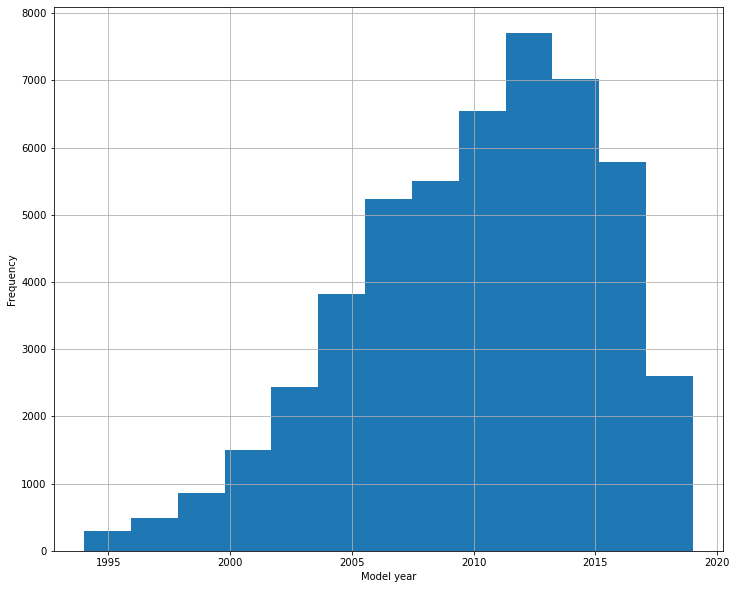

In [75]:
#Checing distribution remains the same
vehicles_df['model_year'].hist(bins=13, figsize=(12,10))
plt.ylabel('Frequency')
plt.xlabel('Model year')

In [76]:
#Print remaining % of missing values
vehicles_df.isna().sum()/len(vehicles_df)

price                  0.000000
model_year             0.000000
model                  0.000000
condition              0.000000
cylinders              0.101817
fuel                   0.000000
odometer               0.145396
transmission           0.000000
type                   0.000000
paint_color            0.000000
is_4wd                 0.000000
date_posted            0.000000
days_listed            0.000000
condition_id           0.000000
odometer_group_id      0.000000
odometer_group         0.000000
model_year_group_id    0.000000
model_year_group       0.000000
dtype: float64

**Odometer has empty values in the 15% of the rows. They will be filled by the median of the same model & model_year category. If no match is found, the median of the same model_year category will be used.**

In [77]:
#Create pivot table to calculate the median of each model & model_year
odometer_pivot= vehicles_df.pivot_table(index=['model','model_year_group'], values='odometer', aggfunc='median')
odometer_pivot.reset_index(inplace=True)
odometer_pivot


,model,model_year_group,odometer
0,acura tl,1994-2005,180.000
1,acura tl,2005-2009,138.281
2,acura tl,2010-2014,122.072
3,bmw x5,1994-2005,157.073
4,bmw x5,2005-2009,129.292
...,...,...,...
364,volkswagen jetta,2015-2019,45.820
365,volkswagen passat,1994-2005,140.000
366,volkswagen passat,2005-2009,138.843
367,volkswagen passat,2010-2014,74.626


In [78]:
#If there's no model with the same model_year group, use the median for that model year group 
odometer_pivot_iferror=vehicles_df.pivot_table(index='model_year_group', values='odometer', aggfunc='median')
odometer_pivot_iferror.reset_index(inplace=True)
odometer_pivot_iferror

,model_year_group,odometer
0,1994-2005,163.000
1,2005-2009,144.676
2,2010-2014,109.000
3,2015-2019,47.095


In [79]:
#fill odometer missing values
for i in range(len(vehicles_df)):
    if pd.isnull(vehicles_df.loc[i, 'odometer']):
        model = vehicles_df.loc[i,'model']
        model_year= vehicles_df.loc[i,'model_year_group']
           
        
        if len(odometer_pivot.query('model_year_group == @model_year & model==@model'))>0:
            odometer= odometer_pivot.loc[(odometer_pivot['model_year_group']==model_year) & (odometer_pivot['model']==model),'odometer'].item()
            vehicles_df.loc[i, 'odometer'] = odometer
        else:
            odometer_error=  odometer_pivot_iferror.loc[(odometer_pivot_iferror['model_year_group']==model_year) ,'odometer'].item()
            vehicles_df.loc[i, 'odometer'] = odometer_error
                
    else:
        continue
        

In [80]:
#check there aren't empty cells anymore
vehicles_df['odometer'].isna().sum()

0

In [81]:
#re-assign grouping to apply it to new values

#apply to df
vehicles_df['odometer_range'] = vehicles_df['odometer'].apply(group_odometer) 
#split ID and group into two columns  where odometer is not null and drop the original one
vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_group_id'] =  list(map(lambda x : x[0], vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_range']))
vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_group'] =  list(map(lambda x : x[1], vehicles_df.loc[pd.notnull(vehicles_df['odometer_range']),'odometer_range']))
vehicles_df.drop('odometer_range',axis=1, inplace=True)

vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group
0,9400,2011.0,bmw x5,good,6.0,gas,145.0000,automatic,SUV,unknown,True,2018-06-23,19,3,3,120k <= odometer < 155 k,3,2010-2014
1,25500,2013.0,ford f-150,good,6.0,gas,88.7050,automatic,pickup,white,True,2018-10-19,50,3,2,70k <= odometer < 120 k,3,2010-2014
2,5500,2013.0,hyundai sonata,new,4.0,gas,110.0000,automatic,sedan,red,False,2019-02-07,79,1,2,70k <= odometer < 120 k,3,2010-2014
3,1500,2003.0,ford f-150,fair,8.0,gas,168.7665,automatic,pickup,unknown,False,2019-03-22,9,4,4,155k <= odometer < 283 k,1,1994-2005
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80.9030,automatic,sedan,black,False,2019-04-02,28,2,2,70k <= odometer < 120 k,4,2015-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49790,9249,2013.0,nissan maxima,new,6.0,gas,88.1360,automatic,sedan,black,False,2018-10-03,37,1,2,70k <= odometer < 120 k,3,2010-2014
49791,2700,2002.0,honda civic,salvage,4.0,gas,181.5000,automatic,sedan,white,False,2018-11-14,22,5,4,155k <= odometer < 283 k,1,1994-2005
49792,3950,2009.0,hyundai sonata,excellent,4.0,gas,128.0000,automatic,sedan,blue,False,2018-11-15,32,2,3,120k <= odometer < 155 k,2,2005-2009
49793,7455,2013.0,toyota corolla,good,4.0,gas,139.5730,automatic,sedan,black,False,2018-07-02,71,3,3,120k <= odometer < 155 k,3,2010-2014


In [82]:
#Checking groups were correctly assigned
vehicles_df.pivot_table(index='odometer_group', values='odometer', aggfunc=['min','max'])

,min,max
,odometer,odometer
odometer_group,,
120k <= odometer < 155 k,120.0,154.982
155k <= odometer < 283 k,155.0,282.493
70k <= odometer < 120 k,70.0,119.997
< 70k,0.0,69.991


**Finally, we'll handle cylinder missing values**

In [83]:
#missing values in cylinder
vehicles_df.corr()['cylinders']

price                  0.303994
model_year            -0.118373
cylinders              1.000000
odometer               0.094596
is_4wd                 0.416115
days_listed            0.003254
condition_id           0.059702
odometer_group_id      0.100653
model_year_group_id   -0.110160
Name: cylinders, dtype: float64

**We see that ``is_4wd`` has the highest correlation rate to ``cylinders``. This is because cars with 4 wheels drive usually have more cylinders, and hence, a more powerful engine.
We'll fill out the missing values based on the model & 4_wd condition of the car.**

In [84]:
#Create pivot table to locate the cylinders associated to each model (median)

cylinders_pivot= vehicles_df.pivot_table(index=['model','is_4wd'], values='cylinders', aggfunc=['min', 'max', 'median'])

cylinders_pivot.reset_index(inplace=True)

cylinders_pivot.columns=['model', 'is_4wd', 'min_cylinders','max_cylinders','median_cylinders']

cylinders_pivot

,model,is_4wd,min_cylinders,max_cylinders,median_cylinders
0,acura tl,False,4.0,6.0,6.0
1,acura tl,True,6.0,6.0,6.0
2,bmw x5,False,6.0,8.0,6.0
3,bmw x5,True,6.0,8.0,6.0
4,buick enclave,False,4.0,8.0,6.0
...,...,...,...,...,...
188,toyota tundra,True,6.0,10.0,8.0
189,volkswagen jetta,False,4.0,6.0,4.0
190,volkswagen jetta,True,4.0,5.0,4.0
191,volkswagen passat,False,4.0,6.0,4.0


In [85]:
#if there's no other car with same is_4wd value, just use model's median cylinders
cylinders_pivot_iferror= vehicles_df.pivot_table(index='model', values='cylinders', aggfunc=['min', 'max', 'median'])

cylinders_pivot_iferror.reset_index(inplace=True)

cylinders_pivot_iferror.columns=['model', 'min_cylinders','max_cylinders','median_cylinders']

cylinders_pivot_iferror

,model,min_cylinders,max_cylinders,median_cylinders
0,acura tl,4.0,6.0,6.0
1,bmw x5,6.0,8.0,6.0
2,buick enclave,4.0,8.0,6.0
3,cadillac escalade,6.0,10.0,8.0
4,chevrolet camaro,4.0,10.0,6.0
...,...,...,...,...
95,toyota sienna,4.0,8.0,6.0
96,toyota tacoma,4.0,8.0,6.0
97,toyota tundra,4.0,10.0,8.0
98,volkswagen jetta,4.0,6.0,4.0


In [86]:
#fill missing values in cylinders:
for i in range(len(vehicles_df)):
    if pd.isnull(vehicles_df.loc[i, 'cylinders']):
        model = vehicles_df.loc[i,'model']
        is_4wd= vehicles_df.loc[i,'is_4wd']
           
        
        if len(cylinders_pivot.query('model ==@model & is_4wd == @is_4wd'))>0:
            cylinders= cylinders_pivot.loc[(cylinders_pivot['model']==model) & (cylinders_pivot['is_4wd']==is_4wd),'median_cylinders'].item()
            vehicles_df.loc[i, 'cylinders'] = cylinders
        else:
            cylinders_iferror= cylinders_pivot_iferror.loc[(cylinders_pivot_iferror['model']==model),'median_cylinders'].item()
            vehicles_df.loc[i, 'cylinders'] = cylinders_iferror
                
    else:
        continue

In [87]:
#Check replacememnt worked
vehicles_df['cylinders'].isna().sum()

0

In [88]:
#Make sure there are no further missing values
vehicles_df.isna().sum()

price                  0
model_year             0
model                  0
condition              0
cylinders              0
fuel                   0
odometer               0
transmission           0
type                   0
paint_color            0
is_4wd                 0
date_posted            0
days_listed            0
condition_id           0
odometer_group_id      0
odometer_group         0
model_year_group_id    0
model_year_group       0
dtype: int64

## Fixing data types

In [89]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49795 entries, 0 to 49794
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                49795 non-null  int64  
 1   model_year           49795 non-null  float64
 2   model                49795 non-null  object 
 3   condition            49795 non-null  object 
 4   cylinders            49795 non-null  float64
 5   fuel                 49795 non-null  object 
 6   odometer             49795 non-null  float64
 7   transmission         49795 non-null  object 
 8   type                 49795 non-null  object 
 9   paint_color          49795 non-null  object 
 10  is_4wd               49795 non-null  bool   
 11  date_posted          49795 non-null  object 
 12  days_listed          49795 non-null  int64  
 13  condition_id         49795 non-null  int64  
 14  odometer_group_id    49795 non-null  int32  
 15  odometer_group       49795 non-null 

In [90]:
#Change model year to datetime value:
vehicles_df['model_year'] = pd.to_datetime(vehicles_df['model_year'], format='%Y').dt.year


In [91]:
#Change date posted to datetime value:
vehicles_df['date_posted'] = pd.to_datetime(vehicles_df['date_posted'], format='%Y-%m-%d')


In [92]:
#Change cylinders to integer:
vehicles_df['cylinders'] = vehicles_df['cylinders'].astype(int)

In [93]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49795 entries, 0 to 49794
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                49795 non-null  int64         
 1   model_year           49795 non-null  int64         
 2   model                49795 non-null  object        
 3   condition            49795 non-null  object        
 4   cylinders            49795 non-null  int32         
 5   fuel                 49795 non-null  object        
 6   odometer             49795 non-null  float64       
 7   transmission         49795 non-null  object        
 8   type                 49795 non-null  object        
 9   paint_color          49795 non-null  object        
 10  is_4wd               49795 non-null  bool          
 11  date_posted          49795 non-null  datetime64[ns]
 12  days_listed          49795 non-null  int64         
 13  condition_id         49795 non-

## Checking values in columns not analyzed before

In [94]:
#Print the proportion each unique value in 'fuel' accounts for in the dataset
(vehicles_df.groupby('fuel')['fuel'].count()/len(vehicles_df)).sort_values()



fuel
electric    0.000120
other       0.002089
hybrid      0.008033
diesel      0.069364
gas         0.920394
Name: fuel, dtype: float64

Text(0, 0.5, 'Frequency')

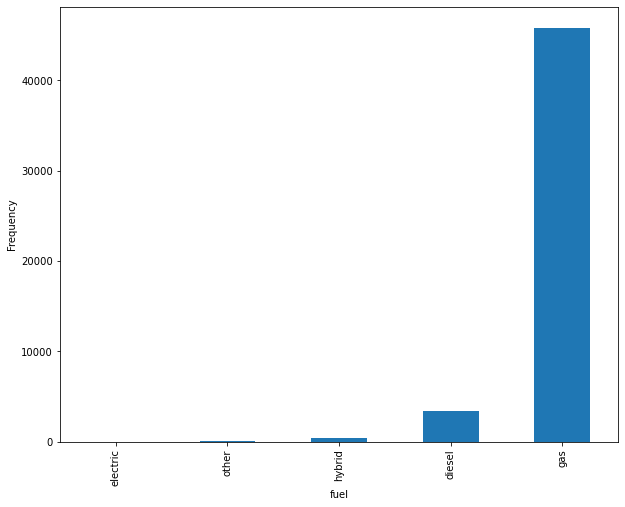

In [95]:
vehicles_df.groupby('fuel')['fuel'].count().sort_values().plot(kind='bar', figsize=(10,8))
plt.ylabel('Frequency')

**92% of the vehicles under analysis are fueled by gas. This is likely to skew the impact of fuel on price, as all the others are under represented in the dataset.**

In [96]:
#Print the proportion each unique value in 'transmission' accounts for in the dataset
(vehicles_df.groupby('transmission')['transmission'].count()/len(vehicles_df)).sort_values()

transmission
other        0.035405
manual       0.050929
automatic    0.913666
Name: transmission, dtype: float64

**91% of the vehicles under analysis are automatic. This is likely to skew the impact of transmission on price, as there are too few samples of manual cars.**

In [97]:
#Print the proportion each unique value in 'type' accounts for in the dataset
(vehicles_df.groupby('type')['type'].count()/len(vehicles_df)).sort_values()

type
bus            0.000462
offroad        0.003836
other          0.004800
convertible    0.007290
van            0.012331
hatchback      0.020183
mini-van       0.022874
wagon          0.030124
coupe          0.041811
pickup         0.133809
truck          0.239120
sedan          0.239622
SUV            0.243739
Name: type, dtype: float64

In [98]:
#print count of unique values
vehicles_df['type'].nunique()

13

In [99]:
#print posting period comprised in dataset
min_date=vehicles_df['date_posted'].min()

max_date=vehicles_df['date_posted'].max()
print(f'The first publication was posted on {min_date} and the last one on {max_date}')

The first publication was posted on 2018-05-01 00:00:00 and the last one on 2019-04-19 00:00:00


Text(0.5, 0, 'Date posted')

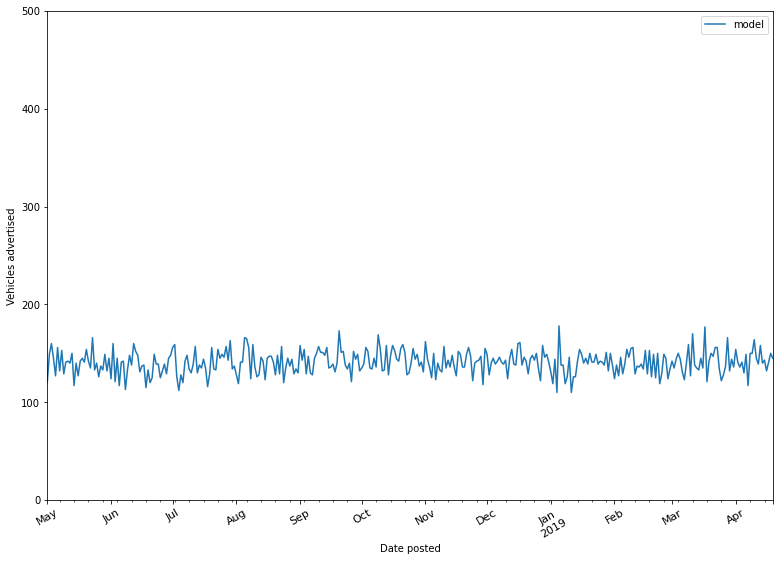

In [100]:
#print count of daily posts

vehicles_df_post=vehicles_df.pivot_table(index='date_posted', values='model', aggfunc='count')

vehicles_df_post.plot(style='-', figsize=(13,9)).tick_params(axis='x', labelsize=11, rotation=30)

plt.ylim(0,500)
plt.ylabel('Vehicles advertised')
plt.xlabel('Date posted')

**A consistent number of posts was made daily. The period under analysis lasts one year, from May 2018 to April 2019**

In [101]:
#Print days listed description:
vehicles_df['days_listed'].describe()

count    49795.000000
mean        39.522482
std         28.188655
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Text(0, 0.5, 'Count of posts')

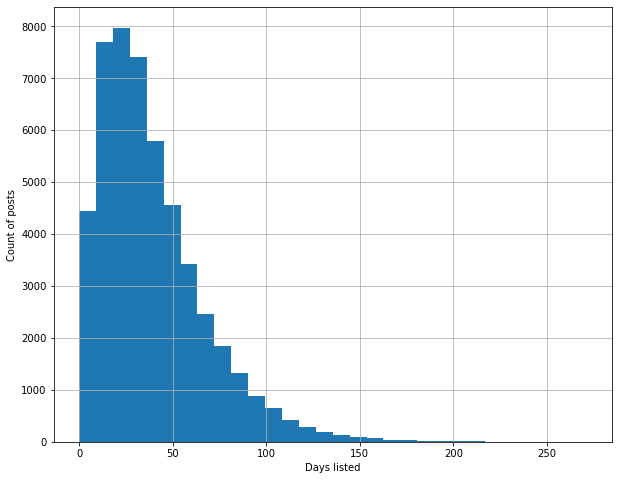

In [102]:
vehicles_df['days_listed'].hist(bins=30, figsize=(10,8))
plt.xlabel('Days listed')
plt.ylabel('Count of posts')

**Most vehicles are listed for less than 100 days, but still, there are some that remain up to 270 days**

In [103]:
#Overview of price column statistics
vehicles_df['price'].describe()

count     49795.000000
mean      12221.692519
std       10045.216490
min           1.000000
25%        5000.000000
50%        9399.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

**We can observe a very wide range of prices a which different vehicles were sold. The standard deviation is higher than the median, and almost as high as the mean.**

**At first sight, it's pretty unlikely that any car was sold at any price lower than €500. We'll take a closer look at their condition, and except that the vehicles were in a terrible status, the % they account for will be assessed to see if it's feasible to dispose of these rows.**

In [104]:
#Calculate theoretical q1 and q3
q1_price= vehicles_df['price'].quantile(0.25)
q3_price= vehicles_df['price'].quantile(0.75)
IQR_price= q3_price-q1_price

th_q1_price= q1_price-1.5*IQR_price
th_q3_price=q3_price+1.5*IQR_price



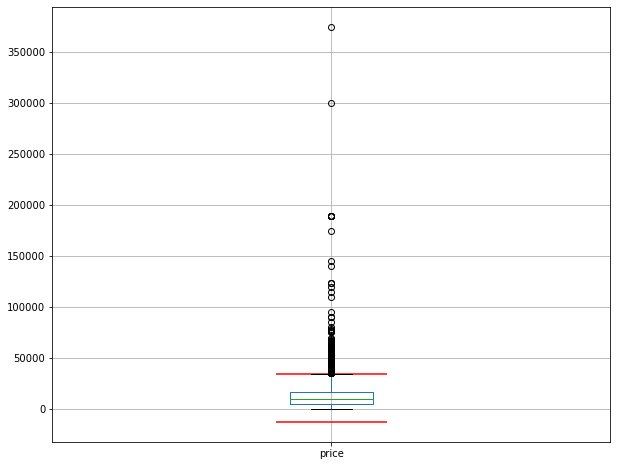

In [105]:
#Plot dispersion
vehicles_df.boxplot('price', figsize=(10,8))
plt.hlines(y=th_q1_price, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=th_q3_price, xmin=0.9,xmax=1.1, color='red')


**The theoretical q1 is negative, hence there are no low outliers.**

In [106]:
th_q3_price

34750.0

In [107]:
#Calculate % of outliers above the upper boundary (theoretical q3)
outliers_price_perc=len(vehicles_df.query('price > @th_q3_price'))/len(vehicles_df)
print(f'{outliers_price_perc*100:.2f}% of the values are higher than the theoretical Q3')

3.18% of the values are higher than the theoretical Q3


In [108]:
#overview of vehicles sold above the Q3
vehicles_df.query('price > @th_q3_price')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group
41,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,109.000,automatic,van,black,False,2019-01-15,16,2,2,70k <= odometer < 120 k,3,2010-2014
97,39950,2018,chevrolet silverado,excellent,8,gas,18.500,automatic,truck,unknown,True,2018-08-05,16,2,1,< 70k,4,2015-2019
122,37000,2018,chevrolet silverado 1500 crew,good,8,gas,30.465,other,pickup,white,True,2019-01-13,55,3,1,< 70k,4,2015-2019
139,39990,2015,chevrolet corvette,new,8,gas,17.340,manual,coupe,unknown,False,2018-07-14,38,1,1,< 70k,4,2015-2019
184,52000,2008,ford f350 super duty,good,8,diesel,117.500,automatic,truck,grey,True,2018-06-27,24,3,2,70k <= odometer < 120 k,2,2005-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49566,47995,2018,ford f-250 sd,good,8,diesel,7.073,automatic,truck,silver,True,2018-08-03,23,3,1,< 70k,4,2015-2019
49584,34995,2014,ford mustang,new,8,gas,7.950,manual,coupe,black,False,2018-07-11,57,1,1,< 70k,3,2010-2014
49614,40990,2016,ram 1500,excellent,8,diesel,107.930,automatic,truck,white,True,2019-03-17,23,2,2,70k <= odometer < 120 k,4,2015-2019
49733,35500,2015,gmc sierra 2500hd,good,8,diesel,106.973,automatic,truck,black,True,2018-05-04,15,3,2,70k <= odometer < 120 k,4,2015-2019


In [109]:
#Calculate % of cards sold below $100
price_too_low=len(vehicles_df.query('price <100'))/len(vehicles_df)
print(f'{price_too_low*100:.2f}% of the values are lower than 100 €')


1.70% of the values are lower than 100 €


In [110]:
#print first and last rows
vehicles_df.query('price <100')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group
395,1,2014,chevrolet camaro,excellent,6,gas,71.310,automatic,coupe,unknown,False,2018-07-14,29,2,2,70k <= odometer < 120 k,3,2010-2014
2970,1,1998,chevrolet silverado,good,8,gas,164.000,automatic,pickup,unknown,True,2018-10-11,49,3,4,155k <= odometer < 283 k,1,1994-2005
3691,1,2007,chevrolet tahoe,good,8,gas,0.200,automatic,SUV,red,False,2019-03-18,63,3,1,< 70k,2,2005-2009
3782,1,1996,ford f-150,fair,8,gas,163.000,manual,truck,white,False,2019-02-23,54,4,4,155k <= odometer < 283 k,1,1994-2005
4008,1,2004,chevrolet silverado,excellent,8,diesel,83.000,automatic,pickup,unknown,True,2019-02-04,14,2,2,70k <= odometer < 120 k,1,1994-2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48034,1,2009,ford f150,excellent,8,gas,139.700,other,pickup,red,True,2019-03-11,18,2,3,120k <= odometer < 155 k,2,2005-2009
48701,1,2003,gmc sierra 2500hd,good,8,diesel,212.300,automatic,pickup,black,True,2019-04-12,28,3,4,155k <= odometer < 283 k,1,1994-2005
48738,5,2011,toyota sienna,good,6,gas,112.908,automatic,SUV,other,False,2018-12-03,5,3,2,70k <= odometer < 120 k,3,2010-2014
49264,10,2012,toyota prius,excellent,4,hybrid,101.000,automatic,hatchback,other,False,2019-03-16,29,2,2,70k <= odometer < 120 k,3,2010-2014


**As there are some relatively new vehicles in an "excellent" condition, we infer the prices were incorrectly collected, or don't reflect the real price of the trade. One possibility is that people posted them at an excessively low price to improve their positioning when buyers sort by lowest price.**

**Therefore, the rows where price is below USD 100, adding up to the 1% of the data will be removed.**

**Following the same line, prices that are too high as compared to the general dataset (outliers) will be disposed of, as they only represent a 3.18% of the data and can bias our evaluation of factors that normally affect the price.**

In [111]:
#remove too high or too low values
vehicles_df= vehicles_df.query('price > 100 and price < @th_q3_price').copy()


In [112]:
#print dataset length after removal
len(vehicles_df)/51525

0.9192430858806405

(0.0, 35000.0)

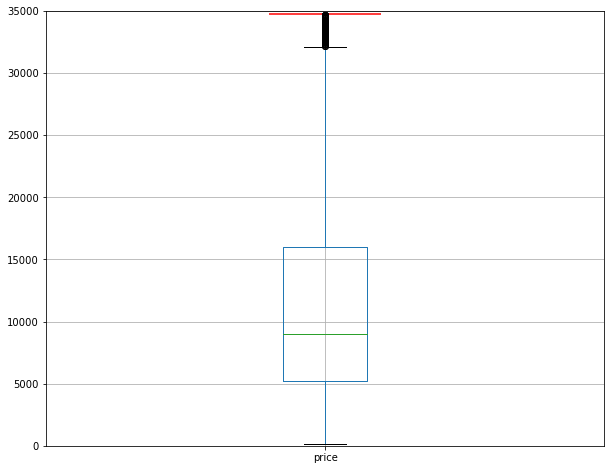

In [113]:
#Plot dispersion
vehicles_df.boxplot('price', figsize=(10,8))
plt.hlines(y=th_q1_price, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=th_q3_price, xmin=0.9,xmax=1.1, color='red')
plt.ylim(0,35000)

## Enrich data

In [114]:
# Add the vehicle's age when the ad was placed

def age_posted (row):
    '''
    Returns the age of each vehicle 
    when it was posted on the website.
    '''
    year_posted= row['date_posted'].year
    year_model = row['model_year']
    age= year_posted-year_model+1
    return age

In [115]:
#add column with the age of the vehicle
vehicles_df['ageing'] = vehicles_df.apply(age_posted, axis=1)

In [116]:
vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group,ageing
0,9400,2011,bmw x5,good,6,gas,145.0000,automatic,SUV,unknown,True,2018-06-23,19,3,3,120k <= odometer < 155 k,3,2010-2014,8
1,25500,2013,ford f-150,good,6,gas,88.7050,automatic,pickup,white,True,2018-10-19,50,3,2,70k <= odometer < 120 k,3,2010-2014,6
2,5500,2013,hyundai sonata,new,4,gas,110.0000,automatic,sedan,red,False,2019-02-07,79,1,2,70k <= odometer < 120 k,3,2010-2014,7
3,1500,2003,ford f-150,fair,8,gas,168.7665,automatic,pickup,unknown,False,2019-03-22,9,4,4,155k <= odometer < 283 k,1,1994-2005,17
4,14900,2017,chrysler 200,excellent,4,gas,80.9030,automatic,sedan,black,False,2019-04-02,28,2,2,70k <= odometer < 120 k,4,2015-2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49790,9249,2013,nissan maxima,new,6,gas,88.1360,automatic,sedan,black,False,2018-10-03,37,1,2,70k <= odometer < 120 k,3,2010-2014,6
49791,2700,2002,honda civic,salvage,4,gas,181.5000,automatic,sedan,white,False,2018-11-14,22,5,4,155k <= odometer < 283 k,1,1994-2005,17
49792,3950,2009,hyundai sonata,excellent,4,gas,128.0000,automatic,sedan,blue,False,2018-11-15,32,2,3,120k <= odometer < 155 k,2,2005-2009,10
49793,7455,2013,toyota corolla,good,4,gas,139.5730,automatic,sedan,black,False,2018-07-02,71,3,3,120k <= odometer < 155 k,3,2010-2014,6


In [117]:
#Checking that age is always >0 as we'll use it in the denominator to calculate mileage per year:

vehicles_df['ageing'].describe()

count    47364.000000
mean         9.358162
std          5.112633
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         26.000000
Name: ageing, dtype: float64

In [118]:
# Calculate the vehicle's average mileage per year

def mileage_per_year(row):
    '''
    Calculates the average miles traveled 
    per year, based on the mileage
    and the age of the vehicle
    '''
    mileage= row['odometer']*1000
    ageing= row['ageing']
    annual_mileage= int(mileage/ageing)
    return annual_mileage


In [119]:
# add new column with avg mileage per year
vehicles_df['mileage_per_year'] = vehicles_df.apply(mileage_per_year, axis=1)

In [120]:
vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group,ageing,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145.0000,automatic,SUV,unknown,True,2018-06-23,19,3,3,120k <= odometer < 155 k,3,2010-2014,8,18125
1,25500,2013,ford f-150,good,6,gas,88.7050,automatic,pickup,white,True,2018-10-19,50,3,2,70k <= odometer < 120 k,3,2010-2014,6,14784
2,5500,2013,hyundai sonata,new,4,gas,110.0000,automatic,sedan,red,False,2019-02-07,79,1,2,70k <= odometer < 120 k,3,2010-2014,7,15714
3,1500,2003,ford f-150,fair,8,gas,168.7665,automatic,pickup,unknown,False,2019-03-22,9,4,4,155k <= odometer < 283 k,1,1994-2005,17,9927
4,14900,2017,chrysler 200,excellent,4,gas,80.9030,automatic,sedan,black,False,2019-04-02,28,2,2,70k <= odometer < 120 k,4,2015-2019,3,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49790,9249,2013,nissan maxima,new,6,gas,88.1360,automatic,sedan,black,False,2018-10-03,37,1,2,70k <= odometer < 120 k,3,2010-2014,6,14689
49791,2700,2002,honda civic,salvage,4,gas,181.5000,automatic,sedan,white,False,2018-11-14,22,5,4,155k <= odometer < 283 k,1,1994-2005,17,10676
49792,3950,2009,hyundai sonata,excellent,4,gas,128.0000,automatic,sedan,blue,False,2018-11-15,32,2,3,120k <= odometer < 155 k,2,2005-2009,10,12800
49793,7455,2013,toyota corolla,good,4,gas,139.5730,automatic,sedan,black,False,2018-07-02,71,3,3,120k <= odometer < 155 k,3,2010-2014,6,23262


## Check clean data

In [121]:
# print the general/summary information about the DataFrame

vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47364 entries, 0 to 49794
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                47364 non-null  int64         
 1   model_year           47364 non-null  int64         
 2   model                47364 non-null  object        
 3   condition            47364 non-null  object        
 4   cylinders            47364 non-null  int32         
 5   fuel                 47364 non-null  object        
 6   odometer             47364 non-null  float64       
 7   transmission         47364 non-null  object        
 8   type                 47364 non-null  object        
 9   paint_color          47364 non-null  object        
 10  is_4wd               47364 non-null  bool          
 11  date_posted          47364 non-null  datetime64[ns]
 12  days_listed          47364 non-null  int64         
 13  condition_id         47364 non-

In [122]:
vehicles_df.describe()

,price,model_year,cylinders,odometer,days_listed,condition_id,odometer_group_id,model_year_group_id,ageing,mileage_per_year
count,47364.000000,47364.000000,47364.000000,47364.000000,47364.000000,47364.000000,47364.000000,47364.000000,47364.000000,47364.000000
mean,11394.094439,2009.948801,6.030276,116.406307,39.535829,2.376193,2.499789,2.632991,9.358162,14523.825585
std,7747.446560,5.098736,1.637108,56.423322,28.200465,0.698235,1.085546,0.977626,5.112633,7971.161119
min,105.000000,1994.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5250.000000,2007.000000,4.000000,76.508750,19.000000,2.000000,2.000000,2.000000,5.000000,9939.000000
50%,8999.000000,2011.000000,6.000000,116.799000,33.000000,2.000000,2.000000,3.000000,9.000000,13157.000000
75%,15995.000000,2014.000000,8.000000,153.841250,53.000000,3.000000,3.000000,3.000000,13.000000,17333.000000
max,34700.000000,2019.000000,12.000000,282.493000,271.000000,5.000000,4.000000,4.000000,26.000000,195700.000000


In [123]:
# print a sample of data
vehicles_df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group,ageing,mileage_per_year
14203,4350,2000,ford focus,excellent,4,gas,56.423,automatic,hatchback,blue,False,2019-01-05,70,2,1,< 70k,1,1994-2005,20,2821
15045,8900,2013,ram 1500,excellent,8,gas,82.500,automatic,pickup,white,True,2019-01-25,80,2,2,70k <= odometer < 120 k,3,2010-2014,7,11785
44340,8750,2011,honda cr-v,excellent,4,gas,116.000,automatic,SUV,other,True,2018-12-06,24,2,2,70k <= odometer < 120 k,3,2010-2014,8,14500
48069,4950,2012,chrysler 200,good,4,gas,98.245,automatic,sedan,white,False,2019-04-13,30,3,2,70k <= odometer < 120 k,3,2010-2014,8,12280
38698,4500,2001,jeep grand cherokee laredo,excellent,6,gas,197.000,automatic,SUV,red,True,2018-05-02,35,2,4,155k <= odometer < 283 k,1,1994-2005,18,10944


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [124]:
#create new dataframe with the columns of interest
vehicles_df_scatter=vehicles_df[['price','ageing','odometer','cylinders','condition_id']]

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='ageing', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='cylinders', ylabel='price'>,
        <AxesSubplot:xlabel='condition_id', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='ageing'>,
        <AxesSubplot:xlabel='ageing', ylabel='ageing'>,
        <AxesSubplot:xlabel='odometer', ylabel='ageing'>,
        <AxesSubplot:xlabel='cylinders', ylabel='ageing'>,
        <AxesSubplot:xlabel='condition_id', ylabel='ageing'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='ageing', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='cylinders', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_id', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='cylinders'>,
        <AxesSubplot:xlabel='ageing', ylabel='cylinders'>,
     

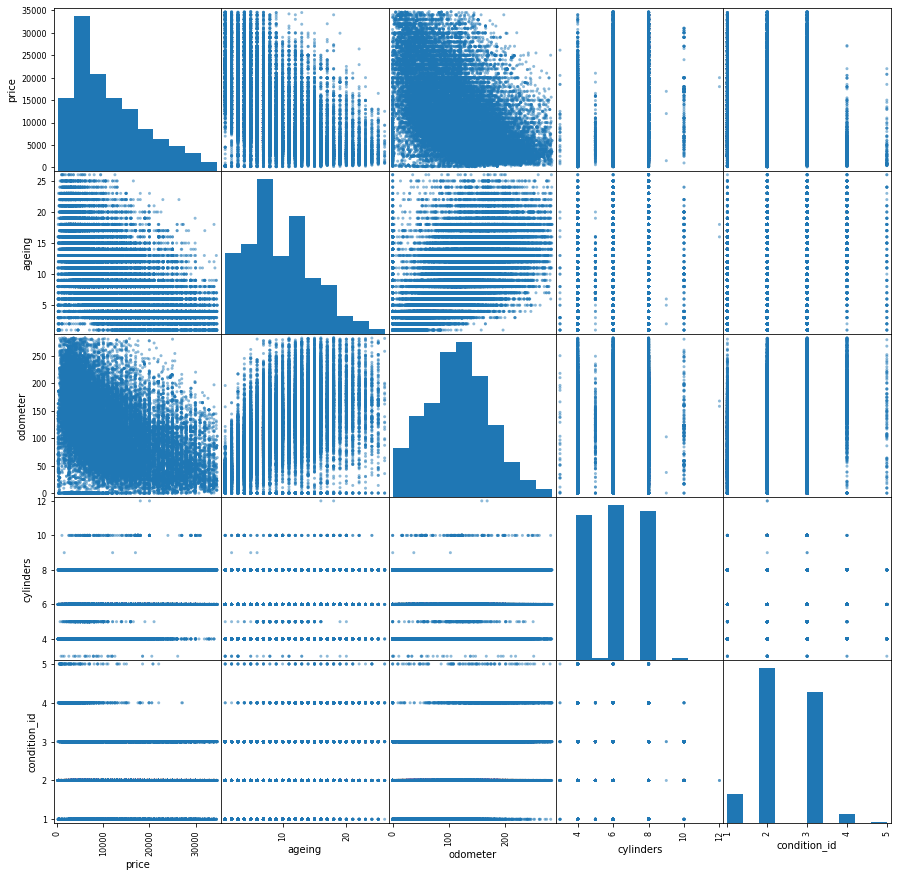

In [125]:
#plot scatter matrix
pd.plotting.scatter_matrix(vehicles_df_scatter,figsize=(15,15))

**As a recap, by this point, outliers in "odometer", "price" and "model_year" (based on which ageing is calculated) have already been disposed of.**

**In the chart above, the negative correlation between ``price`` and ``ageing`` is quite plausible. Yet, the diagonal is rather wide because there are many other factors that impact on the former, such as the vehicle type, model, brand, mileage, among others. Hence, two vehicles with the same age, can be priced completely different.**

**As for ``odometer``, the same pattern can be observed: the higher the odometer, the lower the price. There are many more points in that scatterplot because odometer has much more unique values than age.**

**With regards to ``cylinders``, 6 and 8 seem to be the most frequent values to be sold at high prices, but in general this feature does not have a major impact on price, as each quantity can be priced at many different price point along the Y axis. The same applies to ``condition``, where "fair" and "salvage" were priced from mid to low amounts, whereas "new", "excelent" and "good" took values from the entire range of available prices. This is very consistent in the sense that anyone would pay that much for a vehicle that is in a bad condition, regardless of the model, mileage, or model year, but if it's in good shape, it can be priced high or low depending on these features.**

## Ads lifetime


In [126]:
#mean days listed
mean_days_listed=vehicles_df['days_listed'].mean()
mean_days_listed

39.535828899586186

In [127]:
#median days listed
median_days_listed=vehicles_df['days_listed'].median()
median_days_listed

33.0

In [128]:
#Typical days listed
mode_days_listed=vehicles_df['days_listed'].mode()[0]
mode_days_listed

18

In [129]:
#print data statistics
vehicles_df['days_listed'].describe()

count    47364.000000
mean        39.535829
std         28.200465
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [130]:
#calculate th Q1 and Q3
q1_days_listed= vehicles_df['days_listed'].quantile(0.25)
q3_days_listed= vehicles_df['days_listed'].quantile(0.75)
IQR_days_listed = q3_days_listed-q1_days_listed
th_q1_days_listed= q1_days_listed-1.5*IQR_days_listed
th_q3_days_listed=q3_days_listed+1.5*IQR_days_listed

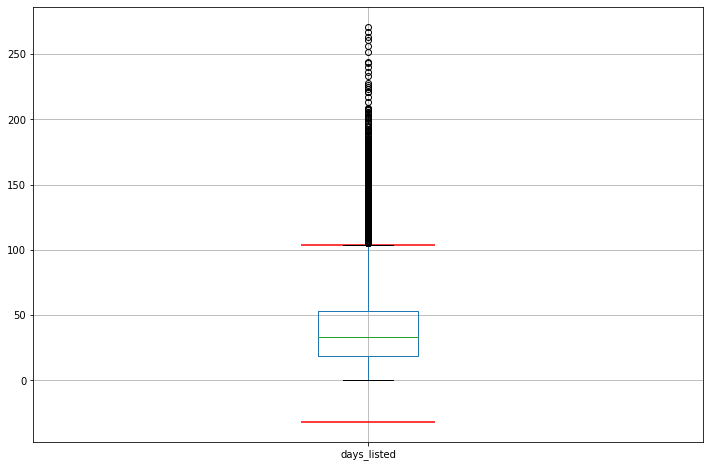

In [131]:
#Plot dispersion
vehicles_df.boxplot('days_listed', figsize=(12,8))
plt.hlines(y=th_q1_days_listed, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=th_q3_days_listed, xmin=0.9, xmax=1.1, color='red')

In [132]:
th_q3_days_listed

104.0

In [133]:
categorical_col= [column for column in list(vehicles_df.columns) if vehicles_df[column].dtype=='O' ]
categorical_col

['model',
 'condition',
 'fuel',
 'transmission',
 'type',
 'paint_color',
 'odometer_group',
 'model_year_group']

In [134]:
numeric_col= [column for column in list(vehicles_df.columns) if (vehicles_df[column].dtype!='O' and vehicles_df[column].dtype!='bool')]
numeric_col

['price',
 'model_year',
 'cylinders',
 'odometer',
 'date_posted',
 'days_listed',
 'condition_id',
 'odometer_group_id',
 'model_year_group_id',
 'ageing',
 'mileage_per_year']

In [135]:
#new dataset including only outliers & new dataset excluding outliers :
df_listed_too_long= vehicles_df.query('days_listed > @th_q3_days_listed')

df_listed_normal= vehicles_df.query('days_listed <= @th_q3_days_listed')


In [136]:
#calculate outliers proportion

len(vehicles_df.query('days_listed > @th_q3_days_listed'))/len(vehicles_df)

0.03139515243644962

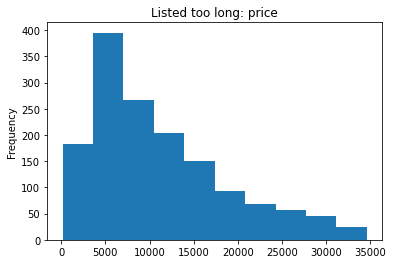

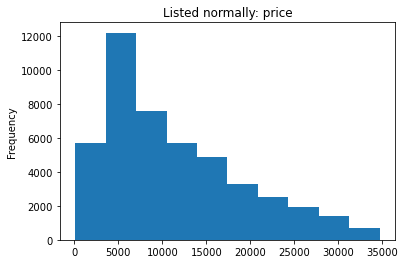

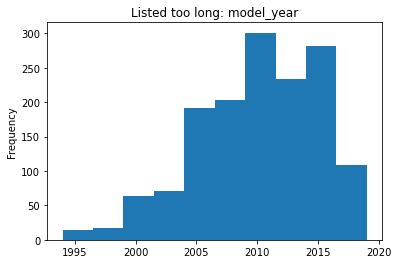

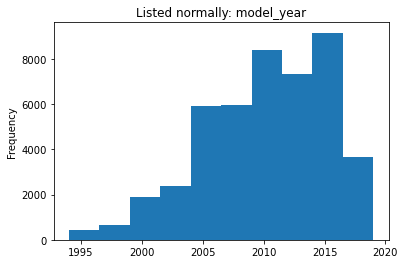

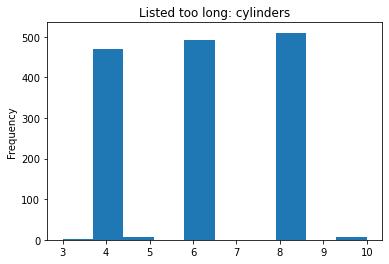

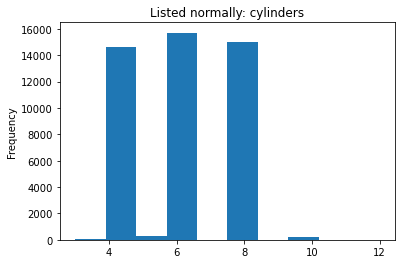

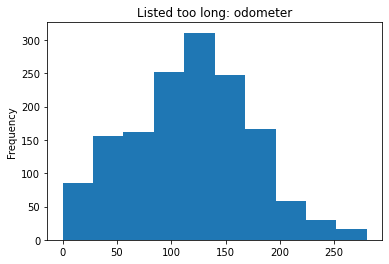

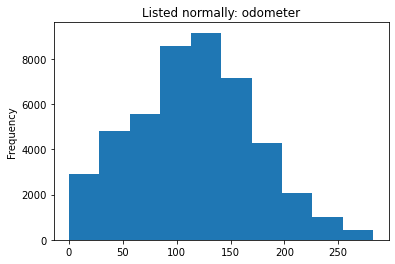

date_posted


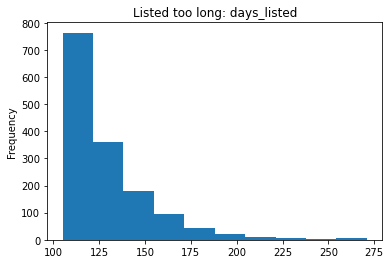

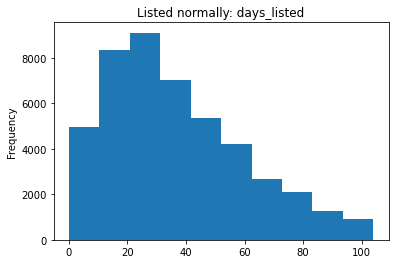

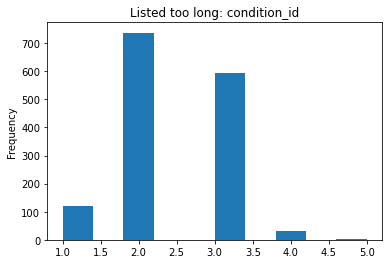

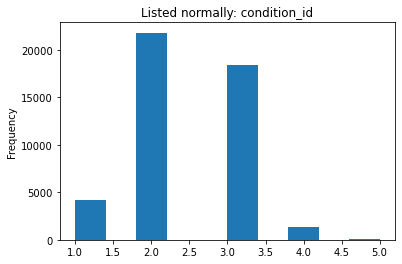

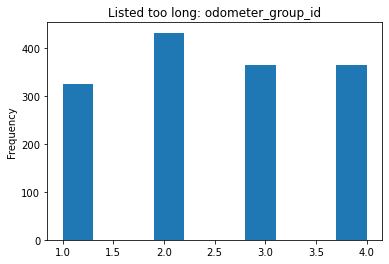

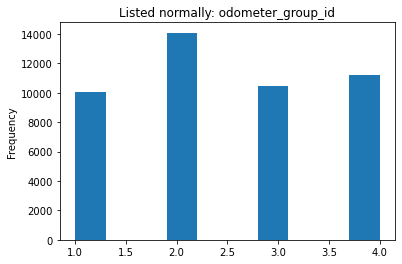

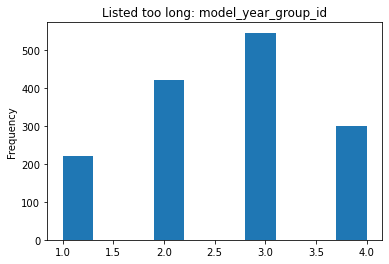

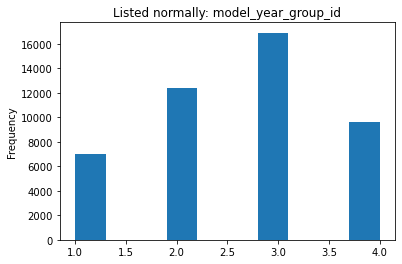

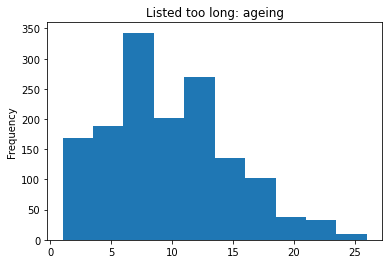

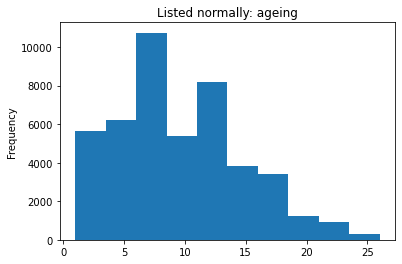

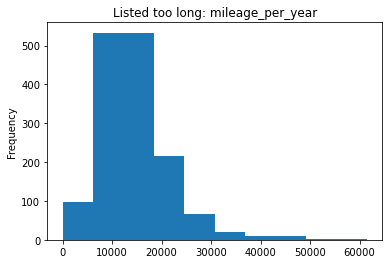

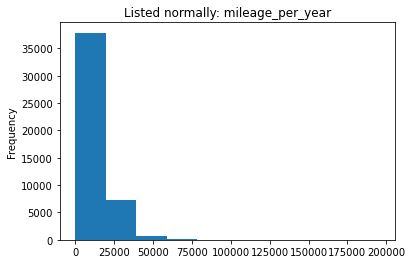

In [137]:
#plot histograms with numeric columns distribution for vehicles listed for too long
for column in numeric_col:
    try:
        
        df_listed_too_long[column].plot(kind='hist', title="Listed too long: "+column)
        plt.show()
        
        df_listed_normal[column].plot(kind='hist', title="Listed normally: "+column)
        plt.show()
        
        
    except:
        print(column)

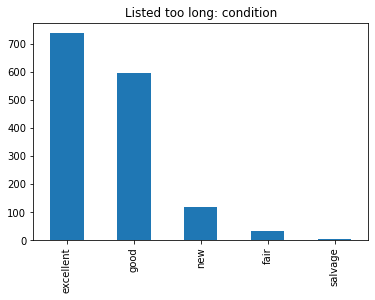

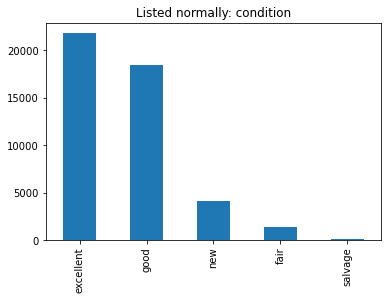

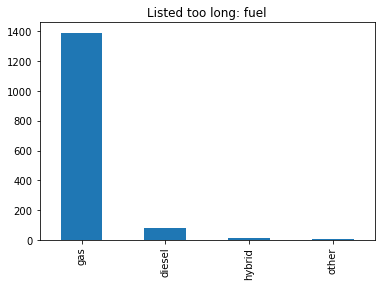

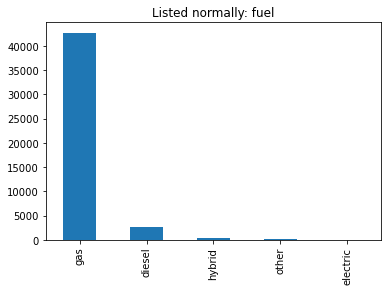

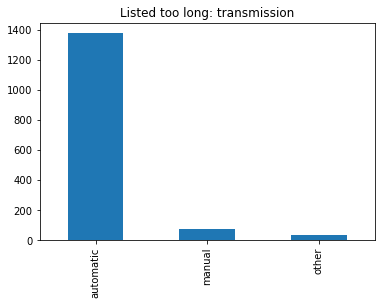

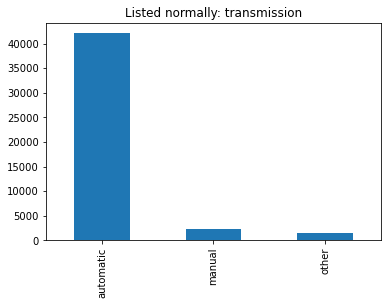

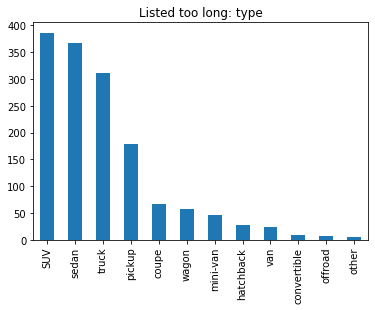

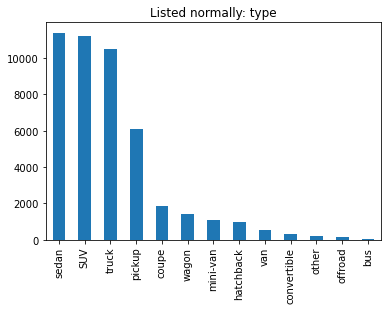

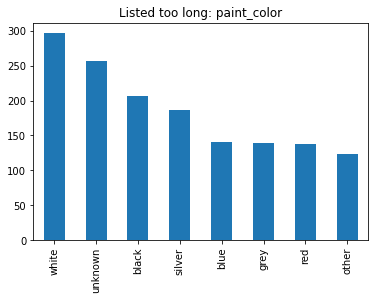

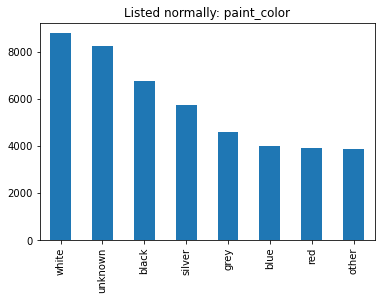

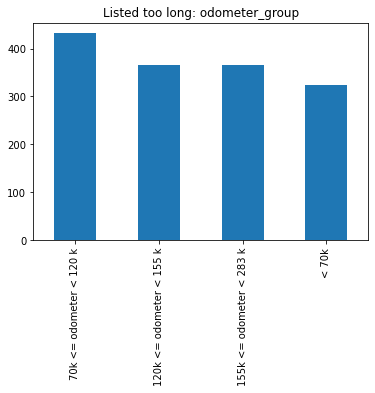

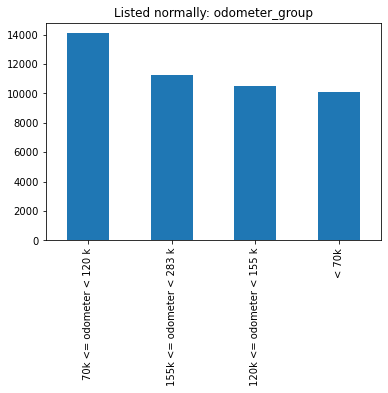

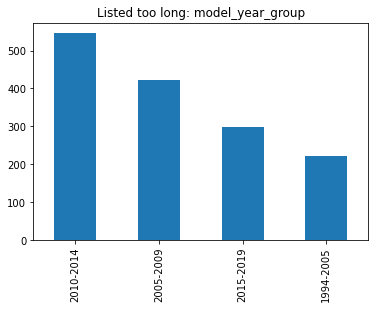

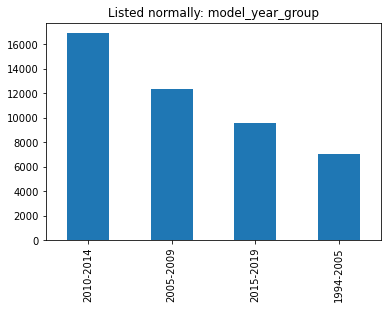

In [138]:
#plot bar charts with categorical columns value counts for vehicles listed for too long
for column in categorical_col:
    if column != 'model':
        df_listed_too_long[column].value_counts().plot(kind='bar', title="Listed too long: "+column)
        plt.show()
        df_listed_normal[column].value_counts().plot(kind='bar', title="Listed normally: "+column)
        plt.show()

**The shape of the histograms and bar charts is similar for both datasets (excluding too long listed vehicles vs. considering only those), except for one column: mileage per year. Apparently, intensive use of vehicles is a bareer for placing them in the second-hand market.**

## Average price per each type of vehicle

In [139]:
#Analyze the number of ads and the average price for each type of vehicle.
vehicle_type_avg_price= vehicles_df.pivot_table(index='type', values='price', aggfunc=['count','mean'])
vehicle_type_avg_price.reset_index(inplace=True)
vehicle_type_avg_price.columns= ['type', 'count','mean_price']
vehicle_type_avg_price.sort_values(by='count', inplace=True)
vehicle_type_avg_price.reset_index(inplace=True,drop=True)
vehicle_type_avg_price

,type,count,mean_price
0,bus,23,17445.913043
1,offroad,181,14437.497238
2,other,235,10523.034043
3,convertible,340,13108.573529
4,van,562,9082.185053
5,hatchback,994,6909.353119
6,mini-van,1133,8056.759047
7,wagon,1491,8951.545942
8,coupe,1948,13932.171971
9,pickup,6294,14981.633302


Text(0.5, 0, 'vehicle type')

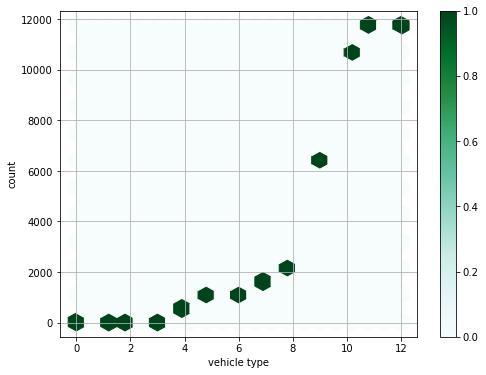

In [140]:
#Plot a graph showing the dependence of the number of ads on the vehicle type. 


vehicle_type_avg_price.reset_index().plot (
    x='index',y='count', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True
)
plt.xlabel('vehicle type')

**The dependence is low for the 3 least listed types, it increases a bit between the fourth and the eighth, and hikes for the 3 most listed ones. Sedan and SUV are the most frequently advertised**

Text(0.5, 0, 'vehicle type')

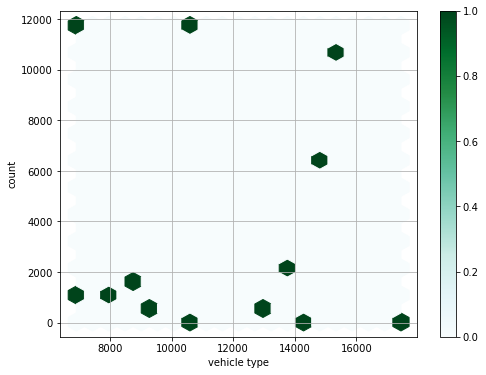

In [141]:
#Plot a graph showing the dependence of the number of ads on the mean_price. 

vehicle_type_avg_price.reset_index().plot (
    x='mean_price',y='count', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True
)
plt.xlabel('vehicle type')

**No interdependency between the count of ads and the average price of each vehicle type**

## Price factors

**As model is supposed to determine price as well, we'll asign an id to that column and assess the correlation between price and the rest of the numeric columns.**

In [142]:
#Creat pivot table by model, calculating median price, and sort in ascending order
model_by_price= vehicles_df.pivot_table(index='model', values='price', aggfunc='median')
model_by_price.reset_index(inplace=True)
model_by_price.columns = ['model', 'median_price']
model_by_price.sort_values(by='median_price', inplace=True)
model_by_price.reset_index(inplace=True,drop=True)
model_by_price

,model,median_price
0,ford taurus,3000.0
1,chevrolet trailblazer,3950.0
2,chevrolet impala,4600.0
3,dodge dakota,4650.0
4,ford ranger,4800.0
...,...,...
94,ford f-350 sd,22800.0
95,ram 3500,22985.0
96,ford f150 supercrew cab xlt,25900.0
97,ford mustang gt coupe 2d,25950.0


In [143]:
#Add column with model id
vehicles_df.reset_index(inplace=True,drop=True)
vehicles_df['model_id']=0
for i in range(len(vehicles_df)):
    vehicles_df.loc[i,'model_id'] = model_by_price.loc[model_by_price['model']==vehicles_df.loc[i,'model']].index.item()
    
vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,condition_id,odometer_group_id,odometer_group,model_year_group_id,model_year_group,ageing,mileage_per_year,model_id
0,9400,2011,bmw x5,good,6,gas,145.0000,automatic,SUV,unknown,...,2018-06-23,19,3,3,120k <= odometer < 155 k,3,2010-2014,8,18125,57
1,25500,2013,ford f-150,good,6,gas,88.7050,automatic,pickup,white,...,2018-10-19,50,3,2,70k <= odometer < 120 k,3,2010-2014,6,14784,71
2,5500,2013,hyundai sonata,new,4,gas,110.0000,automatic,sedan,red,...,2019-02-07,79,1,2,70k <= odometer < 120 k,3,2010-2014,7,15714,23
3,1500,2003,ford f-150,fair,8,gas,168.7665,automatic,pickup,unknown,...,2019-03-22,9,4,4,155k <= odometer < 283 k,1,1994-2005,17,9927,71
4,14900,2017,chrysler 200,excellent,4,gas,80.9030,automatic,sedan,black,...,2019-04-02,28,2,2,70k <= odometer < 120 k,4,2015-2019,3,26967,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47359,9249,2013,nissan maxima,new,6,gas,88.1360,automatic,sedan,black,...,2018-10-03,37,1,2,70k <= odometer < 120 k,3,2010-2014,6,14689,28
47360,2700,2002,honda civic,salvage,4,gas,181.5000,automatic,sedan,white,...,2018-11-14,22,5,4,155k <= odometer < 283 k,1,1994-2005,17,10676,7
47361,3950,2009,hyundai sonata,excellent,4,gas,128.0000,automatic,sedan,blue,...,2018-11-15,32,2,3,120k <= odometer < 155 k,2,2005-2009,10,12800,23
47362,7455,2013,toyota corolla,good,4,gas,139.5730,automatic,sedan,black,...,2018-07-02,71,3,3,120k <= odometer < 155 k,3,2010-2014,6,23262,26


In [144]:
#Create correlation table 
vehicles_df_corr= round(vehicles_df.corr(),2)

vehicles_df_corr


,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,odometer_group_id,model_year_group_id,ageing,mileage_per_year,model_id
price,1.00,0.57,0.34,-0.49,0.36,-0.0,-0.21,-0.49,0.57,-0.57,0.20,0.55
model_year,0.57,1.00,-0.18,-0.61,-0.03,-0.0,-0.28,-0.61,0.95,-1.00,0.47,0.05
cylinders,0.34,-0.18,1.00,0.15,0.41,0.0,0.09,0.16,-0.17,0.18,-0.03,0.63
odometer,-0.49,-0.61,0.15,1.00,0.08,0.0,0.26,0.94,-0.61,0.60,0.18,-0.03
is_4wd,0.36,-0.03,0.41,0.08,1.00,0.0,0.01,0.08,-0.03,0.03,0.04,0.45
days_listed,-0.00,-0.00,0.00,0.00,0.00,1.0,-0.00,0.00,-0.00,0.00,0.00,0.00
condition_id,-0.21,-0.28,0.09,0.26,0.01,-0.0,1.00,0.26,-0.26,0.27,-0.06,0.05
odometer_group_id,-0.49,-0.61,0.16,0.94,0.08,0.0,0.26,1.00,-0.61,0.61,0.13,-0.03
model_year_group_id,0.57,0.95,-0.17,-0.61,-0.03,-0.0,-0.26,-0.61,1.00,-0.94,0.45,0.06
ageing,-0.57,-1.00,0.18,0.60,0.03,0.0,0.27,0.61,-0.94,1.00,-0.48,-0.05


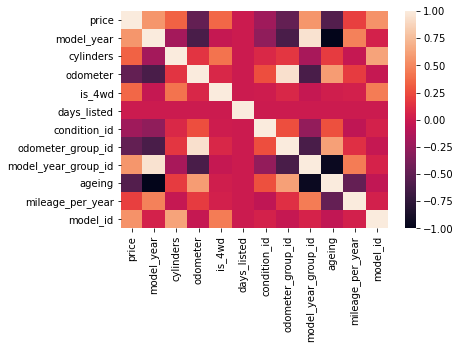

In [145]:
#plot heatmap
sns.heatmap(vehicles_df_corr);

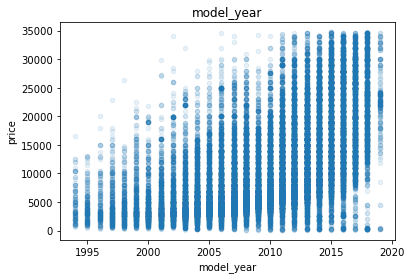

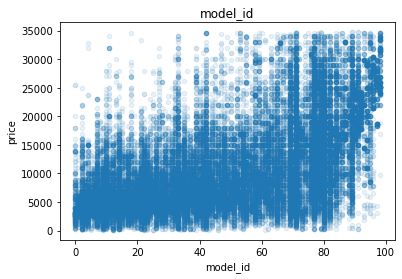

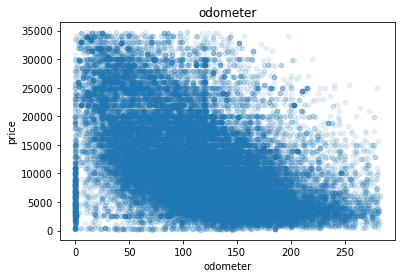

In [146]:
#Plotting scatterplots for the three most impactful numerical columns

for column in ['model_year', 'model_id','odometer']:
    df_to_plot = vehicles_df[[column, 'price']]
    df_to_plot.plot(y='price', x=column, title=column, kind='scatter', alpha=0.1)
    plt.show()

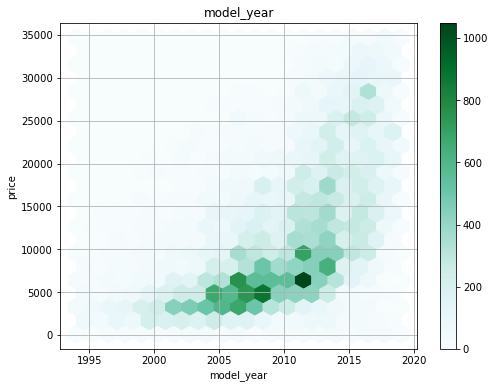

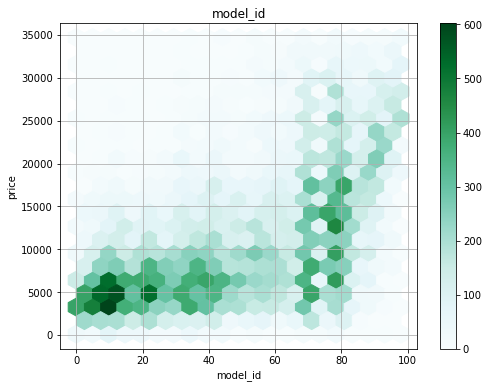

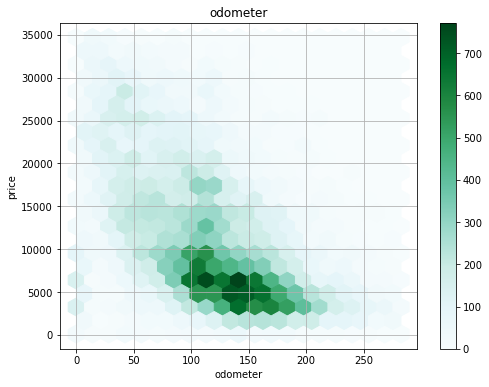

In [147]:
#Plotting hex bins  for the three most impactful numerical columns

for column in ['model_year', 'model_id','odometer']:
    df_to_plot = vehicles_df[[column, 'price']]
    df_to_plot.plot(y='price', x=column, title=column, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
    plt.show()

**Scatter plots confirmed the patterns identified in the heatmap. However, as price is not driven by only one parameter, we see the lines drawn by dots are rather wide.
Hexagonal bins reveal where the highest concentration of interrelated values was. Most vehicles listed were placed in the following ranges of values for each column:
``price``: from USD 4,000 to USD 10,000.
``model_year``: between 2005 and 2015.
``model_id``: cheapest models drive the high correlation, as the 20 cheapest models are the ones listed more frequently. A lower correlation is observed for the most expensive model ids.
``odometer``: most vehicles have a mileage between 100k and 200 k.**

**Next, we'll print boxplots for categorical columns with no numeric ID assigned.**

In [148]:
categorical_col

['model',
 'condition',
 'fuel',
 'transmission',
 'type',
 'paint_color',
 'odometer_group',
 'model_year_group']

In [149]:
#as model is included in numerical cols as model_id, condition as condition_id, and the last two groups are also represented by
#numerical cols, only the rest of the columns will be plotted.
categorical_col_plot=['transmission','type','paint_color','fuel']

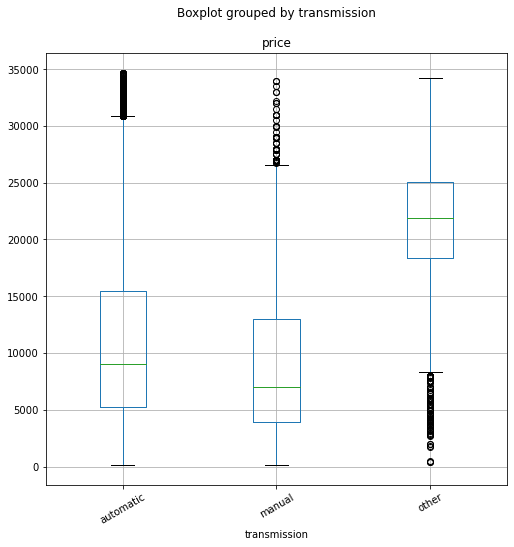

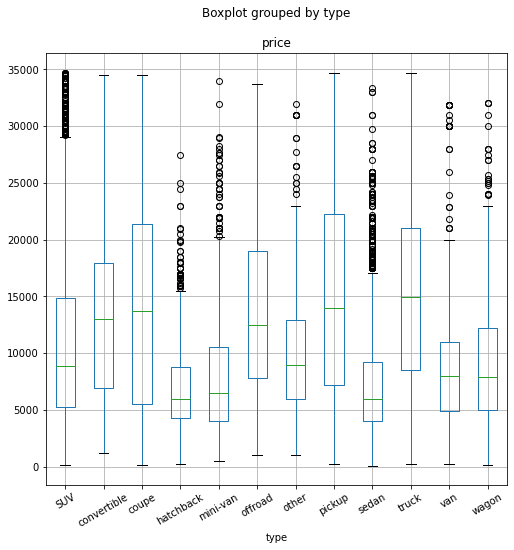

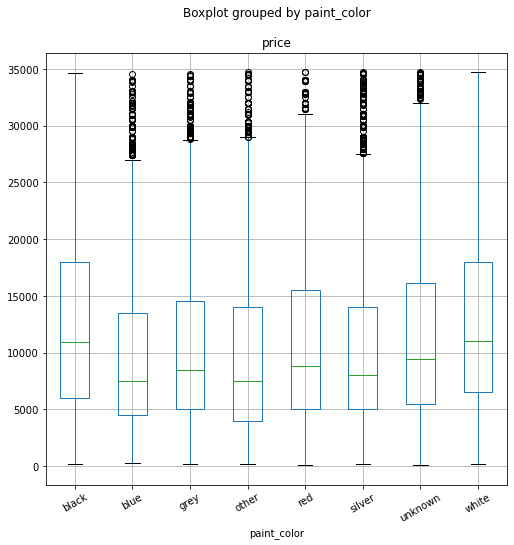

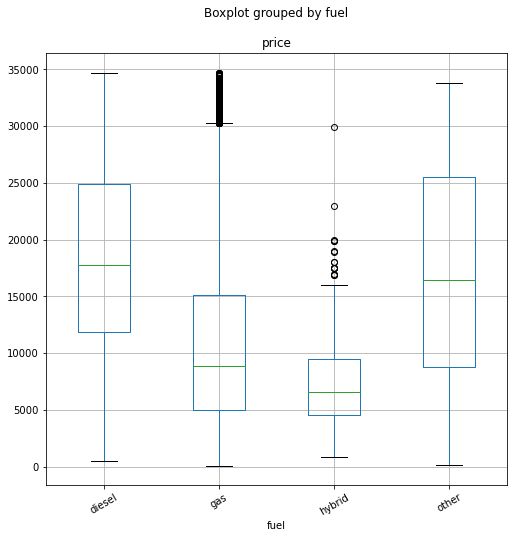

In [150]:
#plot scatter plots with categorical columns to assess price dependency to each category.
#Those categories with less than 50 samples will be excluded from the plot
for column in categorical_col_plot:
    if column != 'model':
        df= pd.DataFrame(vehicles_df[column].value_counts())
        df.reset_index(inplace=True)
        df.columns=[column,'count']
        
        vehicles_df_plot=vehicles_df.merge(df, on=column, how='left')
        vehicles_df_plot=vehicles_df_plot.query('count>50')
        
 
        vehicles_df_plot.boxplot(by=column, column='price', figsize=(8,8)).tick_params(axis='x', rotation=30)
        
        plt.show()

**``Transmission`` other than manual or automatic (Continuously variable transmission (CVT)/Semi-automatic and dual-clutch transmissions seem to have higher prices. However, we know that only the 3% of the vehicles are included in this category, so it's not as well represented as manual (91% of the vehicles listed).**

**``type`` seems to be a determinant of the price range of the vehicle. Coupe, truck and pick-up have the typically highest prices, whilst hatchback, van/mini-van and sedan have the lowest.**

**``color``: black and white have the highest and less dispersed prices. The rest of the colors present many outliers.**

**``fuel``: most expensive vehicles are apparently diesel or other than gas / hybrid. We need to take into consideration that 92% of the vehicles used gas, and only a 6% used diesel, so this conclusion can be biased for the misrepresentation of the latter.**



## General conclusion


# **<span style="color:purple"> What sells a car?</span>**

<font color='purple'>

This document contains a detailed study of data collected over the last few years from "Crankshaft List", a website where hundreds of free advertisements for vehicles are published every day. The objective of the analysis is to determine which factors influence the price of a vehicle.
    
    
The dataset has 51525 rows, and 13 columns (all properly named) containing the following fields:
     
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

Before moving on to the impact assessment work, there were some issues that required fix:

**HANDLE MISSING VALUES**
1) There were five columns with missing values (% of total rows):

``is_4wd``          50%

``paint_color``     17%

``odometer``        15%

``cylinders``       10%

``model_year``      7%

    
    
 a) ``is_4wd``: only true values (1) were found accross the column. Hence, based on the assumption that rows at which this column was empty correspond to vehicles that did not have 4-wheel drive, the missing values were filled out with '0'(false).

 b) ``paint_color``: as a 17% of missing data is too high a percentage as to drop the corresponding rows, an alternative procedure was carried out:
    
    - The proportion of each color out of the total cars listed was calculated.
    
    - Every color accounting for less than the 10% of cars sold was groupped into a new category named 'other'.
    
    - The median price for each color was calculated, and after sorting in ascending order by such metric, a correlative ID was assigned to each color.
    
    - The correlation between color_id and price was assessed, obtaining a very low rate as a result.
        
    - As the price is not likely to be significantly impacted by the vehicle's color, and missing values account for the second largest proportion of data (as compared to the rest of the colors), the best workaround consisted of assigning the label 'unknown' to these empty cells.

c) ``odometer`` & ``model_year``: first off, odometer values were converted to thousands, for the sake of handleability.
    
Some outliers were detected above the theoretical third quartile (283,000.00 miles). This is consistent with the maximum mileage at which a vehicle is usually withdrawn from the market. As this anomaly affected only 487 rows (0.95% of the dataset), they could be disposed of safely. The length of the dataset was reduced to 51,038 observations.
    
Secondly, after detecting that the minimum model_year was not likely to be correct (1908), and in order to accurately analize the possibility of filling out missing values in odometer based on the vehicle's model year, outliers below the theoretical Q1 (year 1994), accounting for the 1.36% of the total population (694 rows) were removed. 50344 was the remaining length of the dataset afterwards.
   
After removing implicit duplicates in ``condition`` ("new" and "like new"), and assigning a consecutive numeric ID from worst to best to that column, the correlation of ``model_year`` to ``condition`` and ``odometer`` was analyzed. As ``model_year`` is much more highly correlated to ``odometer``, after dropping 549 rows where both columns were empty (1.09% of the remaining dataset length), and categorizing data in the latter column into the following groups:
       '< 70k'
       '70k <= odometer < 120 k'
       '120k <= odometer < 155 k'
       '155k <= odometer < 283 k'
           
missing values (6% of the total) were replaced by the median of the same model & odometer category. In case there was no value found with the aforementioned parameters, the median for the odometer category was used instead.
  
Next step consisted of categorizing ``model_year`` in these in 4 groups:

      '1994-2005'
      '2005-2009'
      '2010-2014'
      '2015-2019'       

Finally, ``odometer`` missing values were filled out with the median of the same model and model_year group, or of the model_year_group if no matches were found. 
    
The new values were assigned the corresponding odometer_group category as well.
           

d) ``cylinder``: 'is_4wd' has the highest correlation to "cylinders". This is because cars with 4 wheels drive usually have more cylinders as they demand a more powerful engine.
The missing values were filled based on the median cylinders of each model & is_4wd condition of the car. 
Once again, if there was no other row with the same is_4wd conditio & model, the median cylinders of the same vehicle model were used.
           
           
**FIX DATA TYPES**          
2) After all missing values were replaced, changes were made to three columns data types:


- ``date_posted``:from string to datetime.
-  ``model_year``: from float to datetime.dt.year (integer)
- ``cylinders``, ``is_4wd`` : from float to integer.
           
    

3) Next, the unique values comprised in the columns not yet reviewd were parsed:
           
    ``fuel``: 92% of the vehicles used gas, and 6% Diesel. This is likely to skew the impact of fuel on price, as all the others are under represented in the dataset.
    ``transmission`` :  91% of the vehicles were automatic. There's a misrepresentation of manual cars as well (5%). 3% had type= others.
    ``type``: 13 different types of vehicles were listed.
    ``date_posted``: The dataset shows vehicles posted from May 2018 to April 2019. The count of daily posts fell around 150.
     ``days listed``: between 0 (sold in the same day) and 271. The great majority listed for 50 days or less.
    ``price``: 1.7% of values were below $ 100 and 3.2% were as high as to be considered outliers. Both extreme ranges were removed, as price is the variable of interest in this analysis and it's important to set distorsions aside.
    
The length of the dataset was left to 47364 rows (91% of the original's).

**ENRICH DATA**  
4) The age (in years) of each vehicle when the advertisment was published was calculated and added in a new column ('ageing').
      
5) The average mileage per year was set in column ('milage_per_year').      
                              
**STUDY CORE PARAMETERS**    

6) 4 Core parameters were studied in relation to price throughout a scatter matrix plot: 'ageing','mileage','cylinders' and 'condition' (For context, recall the outliers in ``model_year``(age), ``odometer``(mileage) and ``price`` had been previously removed from the dataset). The outcomes were:

 The negative correlation between price and ageing was quite plausible. Yet, there was a wide range of price points for the same age, because there are many other factors that impact on the former, such as the vehicle type, model, brand, mileage, among others. Hence, two vehicles with the same age, can be priced completely different.

As for odometer, the same pattern can be observed: the higher the odometer, the lower the price. There are many more points in that scatterplot because odometer has much more unique values than age.

With regards to cylinders, 6 and 8 seem to be the most frequent values to be sold at high prices, but in general this feature does not have a major impact on price, as each quantity can correlate to many different price point along the Y axis. The same applies to condition, where "fair" and "salvage" were priced from mid to low amounts, whereas "new", "excelent" and "good" took values from the entire range of available prices. This seems very reasonable in the sense that anyone would pay that much for a vehicle that is in a bad condition and has a short remaining life, regardless of the model, mileage, or model year, but if it's in good shape, it can be priced high or low depending on the rest of the features.

**ANALYZE ADS LIFETIME** 

Vehicles were listed for an average of 40 days, and a median of 33 fays. The most frequent value was 18 days. 

Many outliers were found in top range, with some of them remaining up to 271 days advertised in the website. 

To assess the reason causing these to take longer to sell, the theoretical Q3 was calculated, obtaining 104 days as a result.

Two new datasets were defined: one including all the vehicles listed longer than 104 days, and the other, only the vehicles listed for 104 days or less. Outliers (1st group) accounted for the 3% of the full dataset.

Histograms based on numeric columns and bar charts based on categorical columns value counts were plotted for both datasets, to evaluate whether the distribution of any of the columns was different.

All the patterns were rather similar except for one column: ``mileage per year``. Apparently, intensive use of vehicles is a bareer for placing them in the second-hand market


**AVG PRICE PER VEHICLE TYPE**

After calculating the mean price and the count of ads per vehicle type, an hexagonal bin plot revealed that the three types with a higher count of ads were sedan, SUv and truck. Pick up follows with roughly half of sedan's posts, and the rest of the types account for a much smaller portion of the marketplace publications.

No linear dependency exists between count of ads and median price (usually, the cheapest the type, the higher count of ads place. But in this case, that didn't happen).


**PRICE FACTORS** 

As model is expected to be a great determinant of price, a column was added to the dataset, in which correlative IDs were assigned in ascending order based on their median price.

Next, correlation between all numeric columns was plotted, leading to the conclusion that the numeric factors that have the greatest impact on price are:

``model year`` (ageing has the same absolute correlation but with the negative symbol, as the higher the model year, the lower the age) : 0.57 correlation rate

``model_id`` : 0.55 correlation rate

``odometer``: 0.48 correlation rate 

For the three most impactful numeric columns, scater plots and hexbin plots were printed. Scatter plots confirmed the patterns identified in the heatmap. However, as price is not driven by only one parameter, we see the lines drawn by dots are rather wide.
Hexagonal bins reveal where the highest concentration of interrelated values was. Most vehicles listed were placed in the following ranges of values for each column:

``price``: from USD 4,000 to USD 10,000.

``model_year``: between 2005 and 2015.

``model_id``: cheapest models drive the high correlation, as the 20 cheapest models are the ones listed more frequently. A lower correlation is observed for the most expensive model ids.

``odometer``: most vehicles have a mileage between 100k and 200 k.

Finally, the relation between  categorical columns with no numeric ID assigned and price was evaluated through boxplots, obtaining some relevant insight:

``Transmission`` other than manual or automatic (Continuously variable transmission (CVT)/Semi-automatic and dual-clutch transmissions seem to have higher prices. However, we know that only the 3% of the vehicles are included in this category, so it's not as well represented as manual (91% of the vehicles listed).

``type`` seems to be a determinant of the price range of the vehicle. Coupe, truck and pick-up have the typically highest prices, whilst hatchback, van/mini-van and sedan have the lowest.

``color``: black and white have the highest and less dispersed prices. The rest of the colors present many outliers.

``fuel``: most expensive vehicles are apparently diesel or other than gas / hybrid. We need to take into consideration that 92% of the vehicles used gas, and only a 6% used diesel, so this conclusion can be biased for the misrepresentation of the latter.




</font>